# kmeans_BC


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/tesisJohannaStepanian/ML/step2_mergedCounts_ancestry_subtypes

/content/drive/.shortcut-targets-by-id/1Rb0U_on_je-YZF0eGDbrcqcgLCDA0OtG/tesisJohannaStepanian/ML/step2_mergedCounts_ancestry_subtypes


## 0. Dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
breast_cancer = pd.read_csv('mostVariantGenes_ancestry_normalizedcounts.csv')


In [5]:
breast_cancer.head()

sample      K2.1      K2.2      K3.1      K3.2      K3.3  \
0  06S10197329_S4_L003  0.968868  0.031132  0.037672  0.936120  0.026208   
1  06S10197329_S4_L004  0.967888  0.032112  0.033182  0.939076  0.027742   
2  06S18074953_S3_L001  0.964684  0.035316  0.000010  0.974376  0.025614   
3  06S18074953_S3_L002  0.963306  0.036694  0.000010  0.972688  0.027302   
4  06S18074953_S3_L003  0.961074  0.038926  0.000010  0.971778  0.028212   

       K4.1      K4.2      K4.3     K4.4  ...  gene-LOC107987206|LOC107987206  \
0  0.048288  0.923092  0.028610  0.00001  ...                             0.0   
1  0.042181  0.929105  0.028703  0.00001  ...                             0.0   
2  0.000010  0.972885  0.027095  0.00001  ...                             0.0   
3  0.000010  0.972126  0.027854  0.00001  ...                             0.0   
4  0.000010  0.971502  0.028478  0.00001  ...                             0.0   

   gene-LOC112268313|LOC112268313  gene-ALB|ALB  \
0                       443.17921      13.63628   
1                       441.47100      10.78951   
2                       257.61280       0.00000   
3                       275.78854      11.61215   
4                       252.92926      11.91333   

   06S10197329_S4_L001.39174|ND6  subtype  subtype.proba.Basal  \
0                       33.23844     LumB                  0.0   
1                       25.17553     LumB                  0.0   
2                       39.48809     LumB                  0.0   
3                       50.31931     LumB                  0.0   
4                       43.98770     LumB                  0.0   

   subtype.proba.Her2  subtype.proba.LumA  subtype.proba.LumB  \
0            0.433383                 0.0            0.566617   
1            0.424047                 0.0            0.575953   
2            0.345383                 0.0            0.654617   
3            0.323875                 0.0            0.676125   
4            0.336832                 0.0            0.663168   

   subtype.proba.Normal  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 118 columns]

In [6]:
breast_cancer['subtype'].value_counts()

Basal     115
LumB       61
LumA       56
Normal     46
Her2       45
Name: subtype, dtype: int64

In [7]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Columns: 118 entries, sample to subtype.proba.Normal
dtypes: float64(116), object(2)
memory usage: 297.9+ KB


In [8]:
#Eliminar valores nulos y sample column y todos los valores de probabilidad para los subtipos 
breast_cancer.dropna(axis=0, inplace=True)
breast_cancer= breast_cancer.drop('sample',axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.Basal', axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.Her2', axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.LumB', axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.LumA', axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.Normal', axis=1)


In [9]:
breast_cancer.head()

K2.1      K2.2      K3.1      K3.2      K3.3      K4.1      K4.2  \
0  0.968868  0.031132  0.037672  0.936120  0.026208  0.048288  0.923092   
1  0.967888  0.032112  0.033182  0.939076  0.027742  0.042181  0.929105   
2  0.964684  0.035316  0.000010  0.974376  0.025614  0.000010  0.972885   
3  0.963306  0.036694  0.000010  0.972688  0.027302  0.000010  0.972126   
4  0.961074  0.038926  0.000010  0.971778  0.028212  0.000010  0.971502   

       K4.3     K4.4      K5.1  ...  gene-RNA45SN1|RNA45SN1  gene-FTH1|FTH1  \
0  0.028610  0.00001  0.045163  ...              6261.61082     59290.55966   
1  0.028703  0.00001  0.030383  ...              6929.56600     59863.82000   
2  0.027095  0.00001  0.000010  ...              5168.23900     48685.06000   
3  0.027854  0.00001  0.000010  ...              4860.65197     48301.70084   
4  0.028478  0.00001  0.000010  ...              4714.93133     48008.90622   

   gene-HSP90AA1|HSP90AA1  gene-LALBA|LALBA  gene-CSN2|CSN2  \
0             28868.86395               0.0             0.0   
1             29804.24000               0.0             0.0   
2            148613.40000               0.0             0.0   
3            148214.56493               0.0             0.0   
4            146690.72358               0.0             0.0   

   gene-LOC107987206|LOC107987206  gene-LOC112268313|LOC112268313  \
0                             0.0                       443.17921   
1                             0.0                       441.47100   
2                             0.0                       257.61280   
3                             0.0                       275.78854   
4                             0.0                       252.92926   

   gene-ALB|ALB  06S10197329_S4_L001.39174|ND6  subtype  
0      13.63628                       33.23844     LumB  
1      10.78951                       25.17553     LumB  
2       0.00000                       39.48809     LumB  
3      11.61215                       50.31931     LumB  
4      11.91333                       43.98770     LumB  

[5 rows x 112 columns]

In [10]:
#Eliminar labels de subtypo 
nonSupervised = breast_cancer.drop('subtype', axis=1)
nonSupervised.head()

K2.1      K2.2      K3.1      K3.2      K3.3      K4.1      K4.2  \
0  0.968868  0.031132  0.037672  0.936120  0.026208  0.048288  0.923092   
1  0.967888  0.032112  0.033182  0.939076  0.027742  0.042181  0.929105   
2  0.964684  0.035316  0.000010  0.974376  0.025614  0.000010  0.972885   
3  0.963306  0.036694  0.000010  0.972688  0.027302  0.000010  0.972126   
4  0.961074  0.038926  0.000010  0.971778  0.028212  0.000010  0.971502   

       K4.3     K4.4      K5.1  ...  gene-LOC112268284|LOC112268284  \
0  0.028610  0.00001  0.045163  ...                        0.000000   
1  0.028703  0.00001  0.030383  ...                        0.899126   
2  0.027095  0.00001  0.000010  ...                        0.000000   
3  0.027854  0.00001  0.000010  ...                        0.000000   
4  0.028478  0.00001  0.000010  ...                        0.000000   

   gene-RNA45SN1|RNA45SN1  gene-FTH1|FTH1  gene-HSP90AA1|HSP90AA1  \
0              6261.61082     59290.55966             28868.86395   
1              6929.56600     59863.82000             29804.24000   
2              5168.23900     48685.06000            148613.40000   
3              4860.65197     48301.70084            148214.56493   
4              4714.93133     48008.90622            146690.72358   

   gene-LALBA|LALBA  gene-CSN2|CSN2  gene-LOC107987206|LOC107987206  \
0               0.0             0.0                             0.0   
1               0.0             0.0                             0.0   
2               0.0             0.0                             0.0   
3               0.0             0.0                             0.0   
4               0.0             0.0                             0.0   

   gene-LOC112268313|LOC112268313  gene-ALB|ALB  06S10197329_S4_L001.39174|ND6  
0                       443.17921      13.63628                       33.23844  
1                       441.47100      10.78951                       25.17553  
2                       257.61280       0.00000                       39.48809  
3                       275.78854      11.61215                       50.31931  
4                       252.92926      11.91333                       43.98770  

[5 rows x 111 columns]

## 1. KMeans

### Método del codo para selección de numero de klusters

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

El método del codo es un método heurístico para seleccionar el numero de cluster en el dataset, este consiste en graficar la inercia vs en numero de clusters y elegir el valor del cluster que esta en el codo de la curva.

La inercia mide qué tan bien K-Means agrupa un conjunto de datos. Se calcula midiendo la distancia entre cada punto de datos y su centroide, elevando al cuadrado esta distancia y sumando estos cuadrados en un grupo. Un buen modelo es uno con baja inercia y un bajo número de conglomerados (K).

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

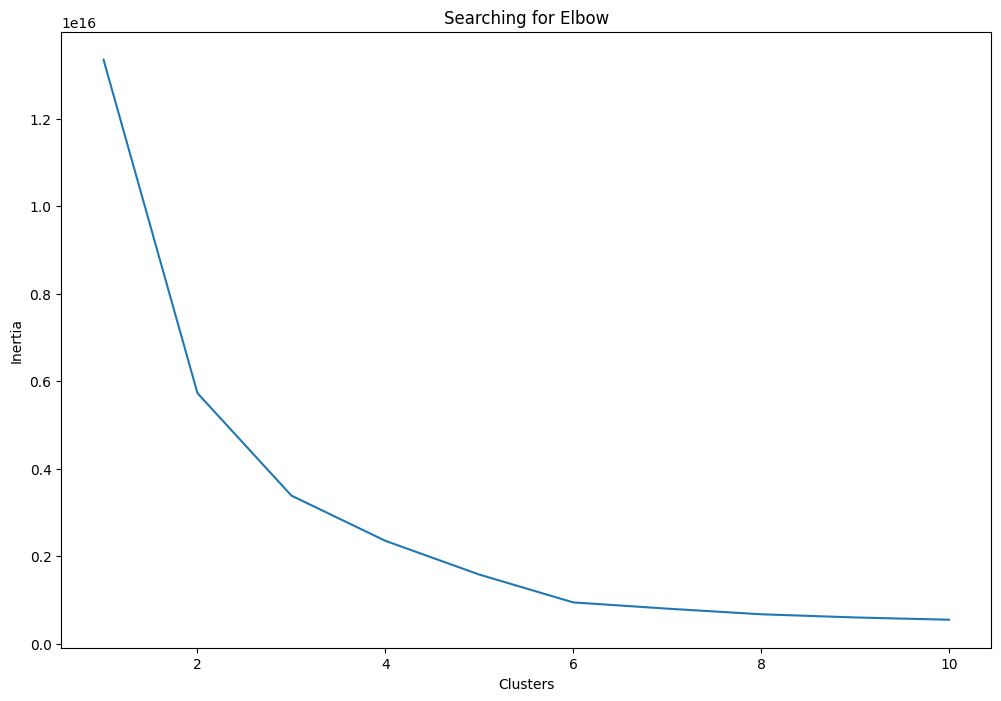

In [11]:
#este es el codo que me había pasado JP
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(nonSupervised)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

Como el codo en el test de arriba no está tan claro aplicaremos un silhoutte score que encontré acá: https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

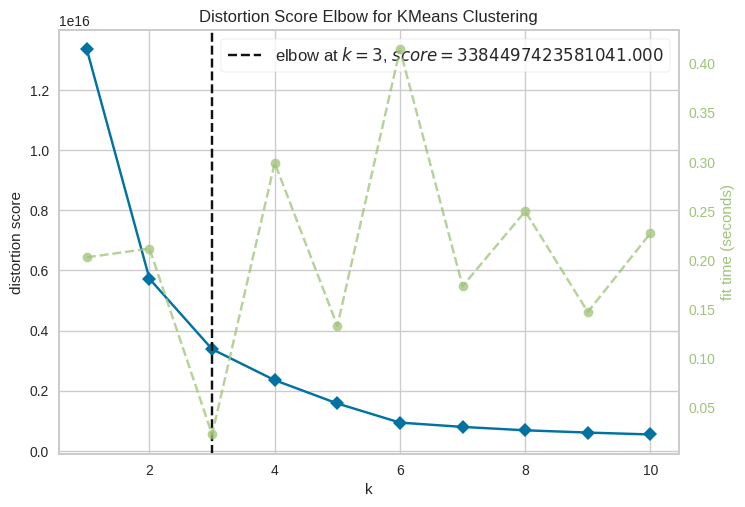

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
#primero volveré a hacer el codo 
!pip install yellowbrick 

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#Instantiate the clustering model and visualizer 
km = KMeans(random_state=33)
visualizer = KElbowVisualizer(km, k=(1,11))
visualizer.fit(nonSupervised)
visualizer.show() 

In [13]:
from yellowbrick.cluster.silhouette import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
for i in [2,3,4,5,6,7,8,9]:
  km = KMeans(n_clusters=i, random_state=42)
#
# Fit the KMeans model
#
  preds = km.fit_predict(nonSupervised)
#
# Calculate Silhoutte Score
#
  score = silhouette_score(nonSupervised, preds, metric='euclidean')
#
# Print the score
#
  print(f'Silhouetter Score for {i}: {score}')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Score for 2: 0.959737240140386
Silhouetter Score for 3: 0.8129325111123186


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Score for 4: 0.7982270679763905


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Score for 5: 0.7733330694398932
Silhouetter Score for 6: 0.7774518282730595


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Score for 7: 0.7749821219699539
Silhouetter Score for 8: 0.6612287754293887


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Score for 9: 0.7110223719808045


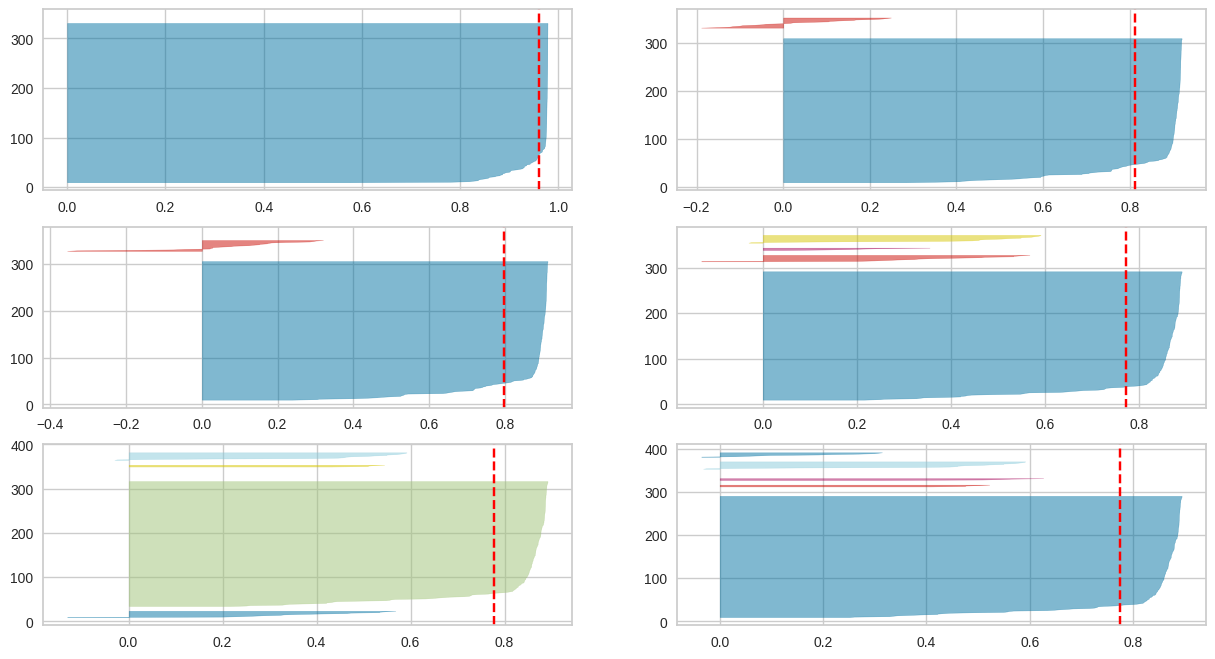

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer


fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2,3,4,5,6,7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(nonSupervised) 

<Axes: >

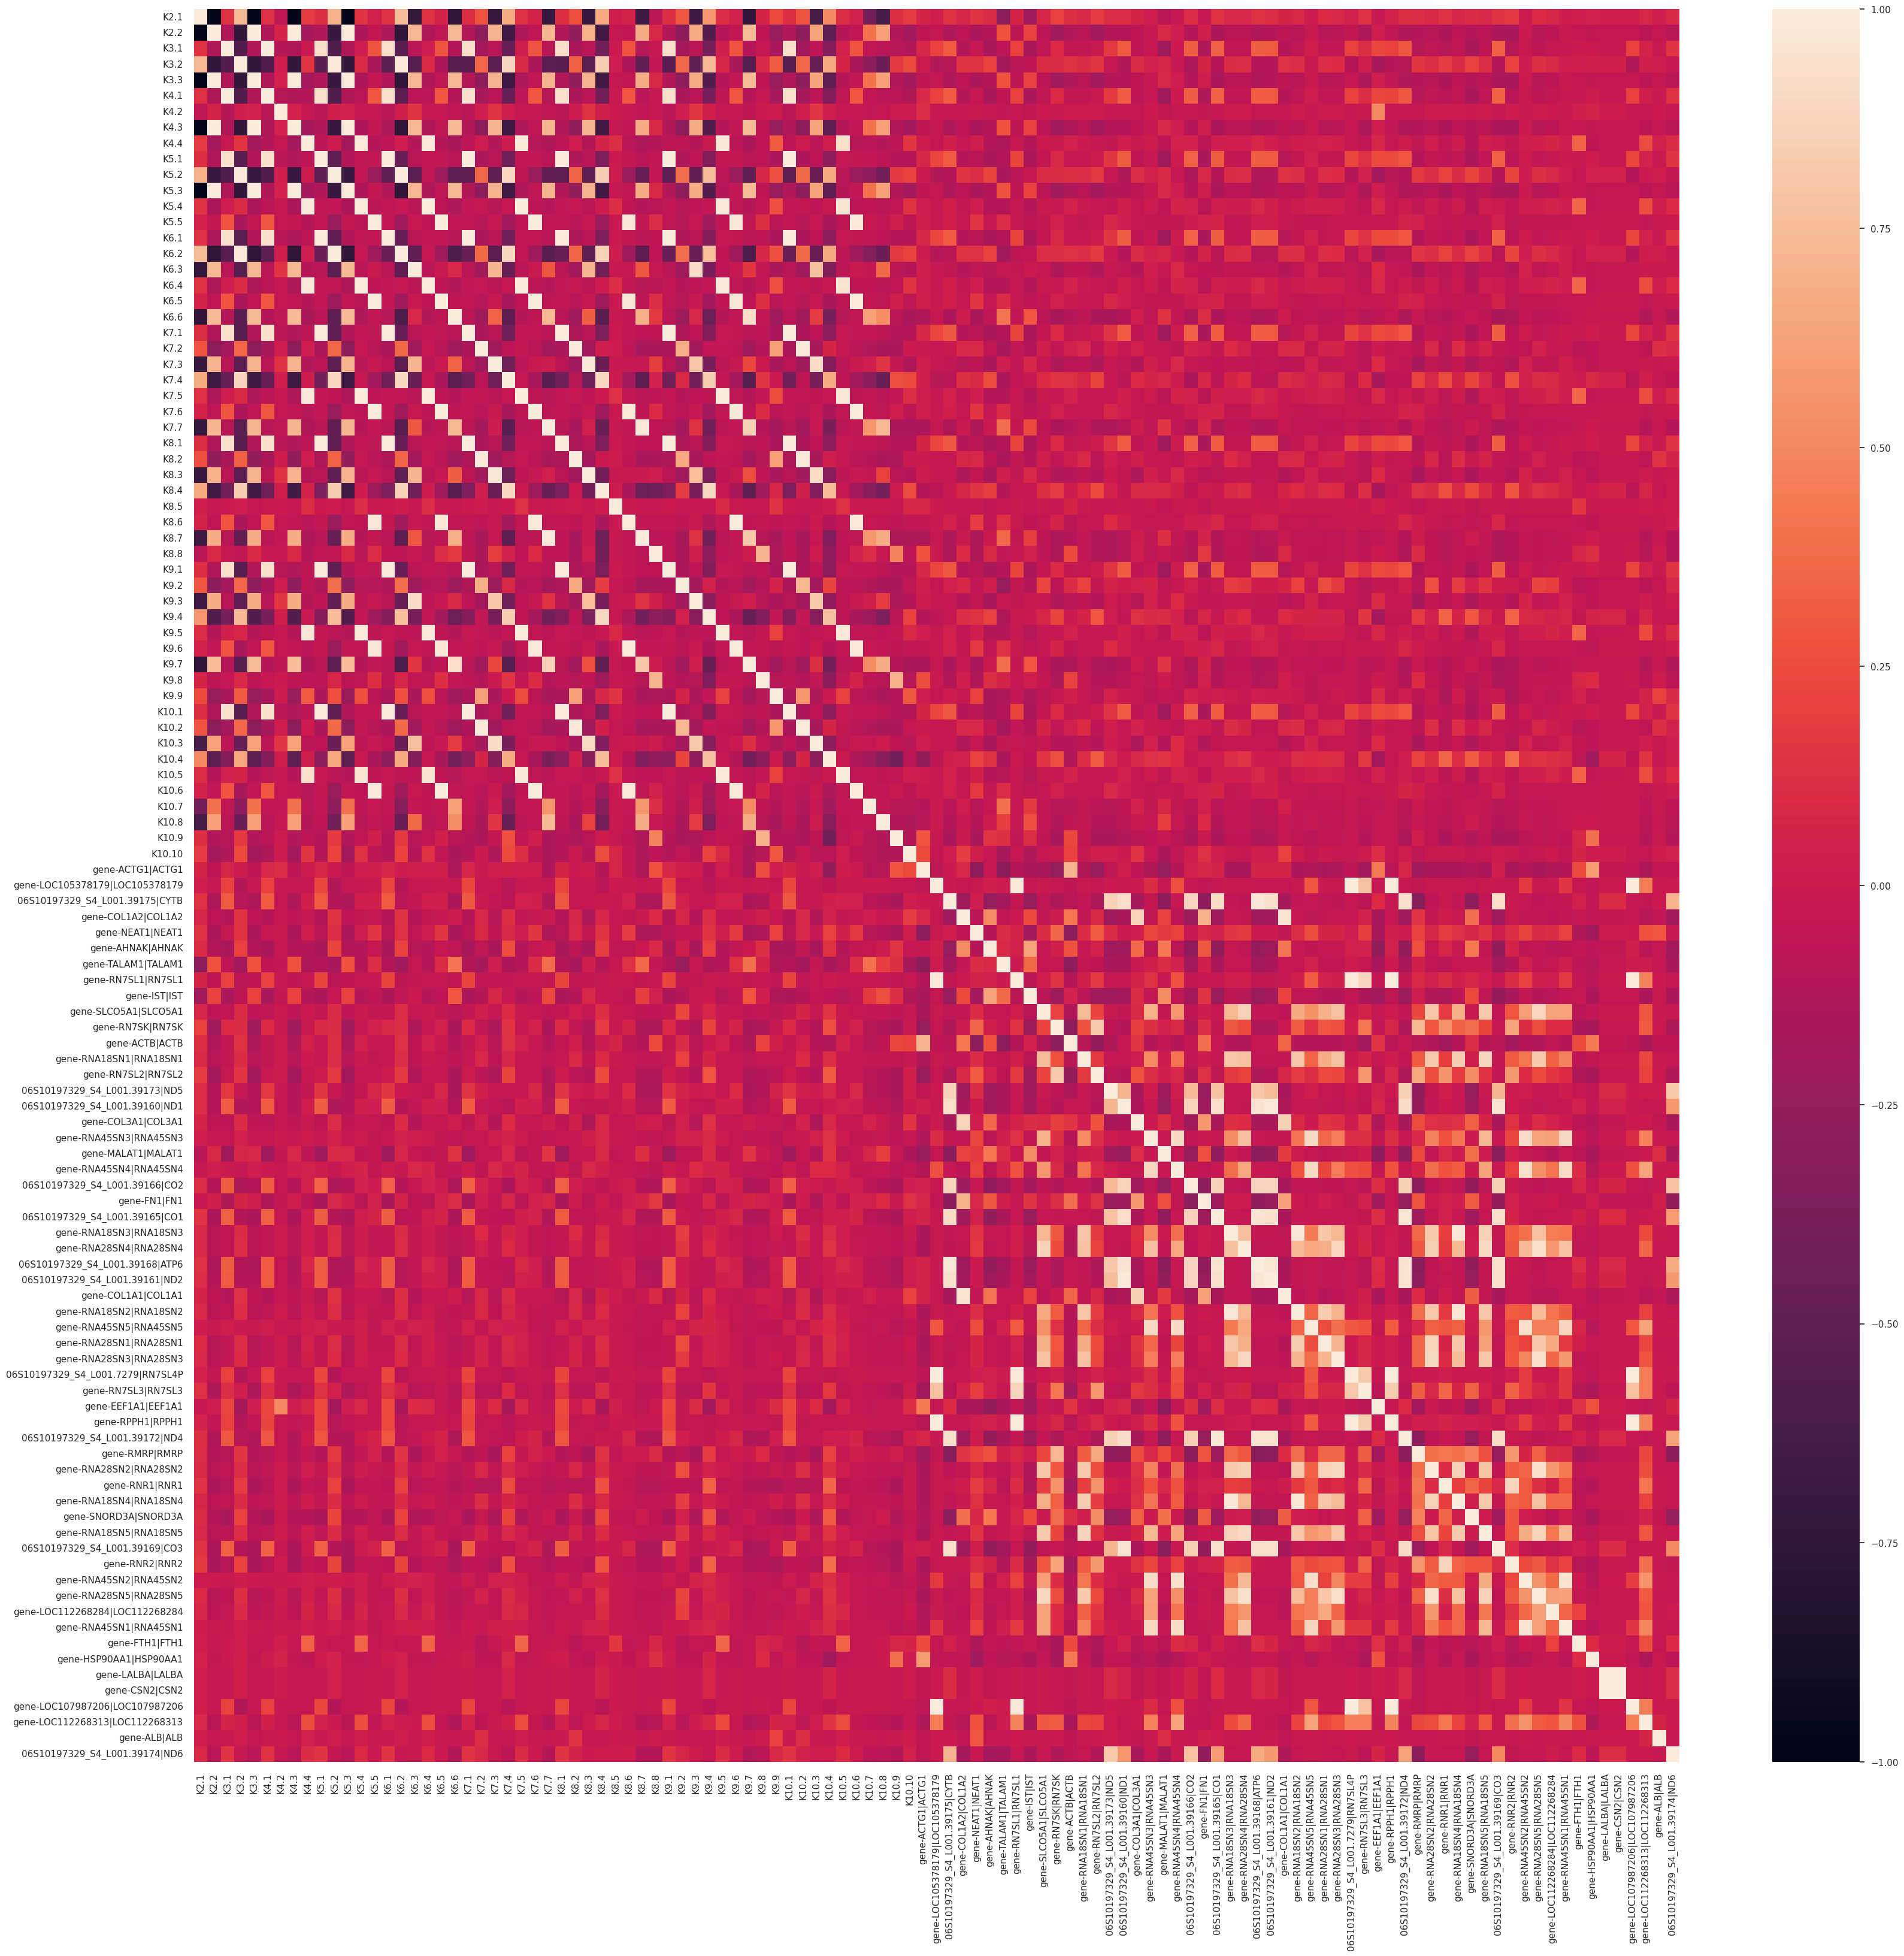

In [15]:
#Pero solo toma en cuenta las primeras columnas, entonces hagamos correlación para ver las 3 mas correlacionadas y repetir el grafico 
corr_matrix = nonSupervised.corr()
sns.set(rc={'figure.figsize':(40,38)})
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


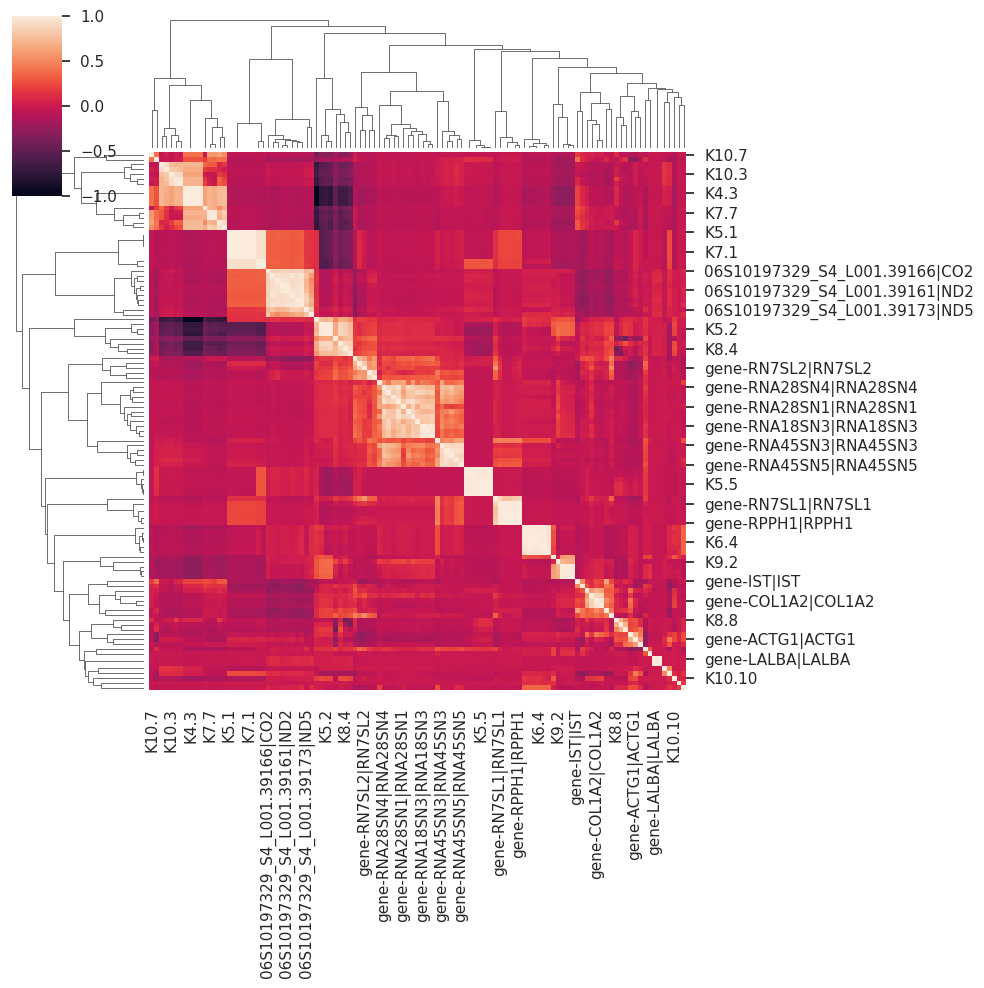

In [16]:
#Aca quería crear clusters para elegir los 3 mejores pero no sirvió 
sns.set(rc={'figure.figsize':(40,38)})
sns.clustermap(corr_matrix)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 0 0 0 0
 0 0 2 2 2 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4
 0 0 4 4 4 4 4 4 4 3 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 4 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Centroides:  [[8.46236042e-01 1.53763958e-01 9.41568127e-02 7.55113261e-01
  1.50729936e-01 8.91259081e-02 8.68052728e-01 1.50827675e-01
  4.02551625e-02 6.89904806e-02 7.17307915e-01 1.50193311e-01
  3.09334064e-02 3.25748657e-02 6.82974276e-02 6.97824173e-01
  7.16889894e-02 3.02515972e-02 3.18905300e-02 1.00047269e-01
  6.229259

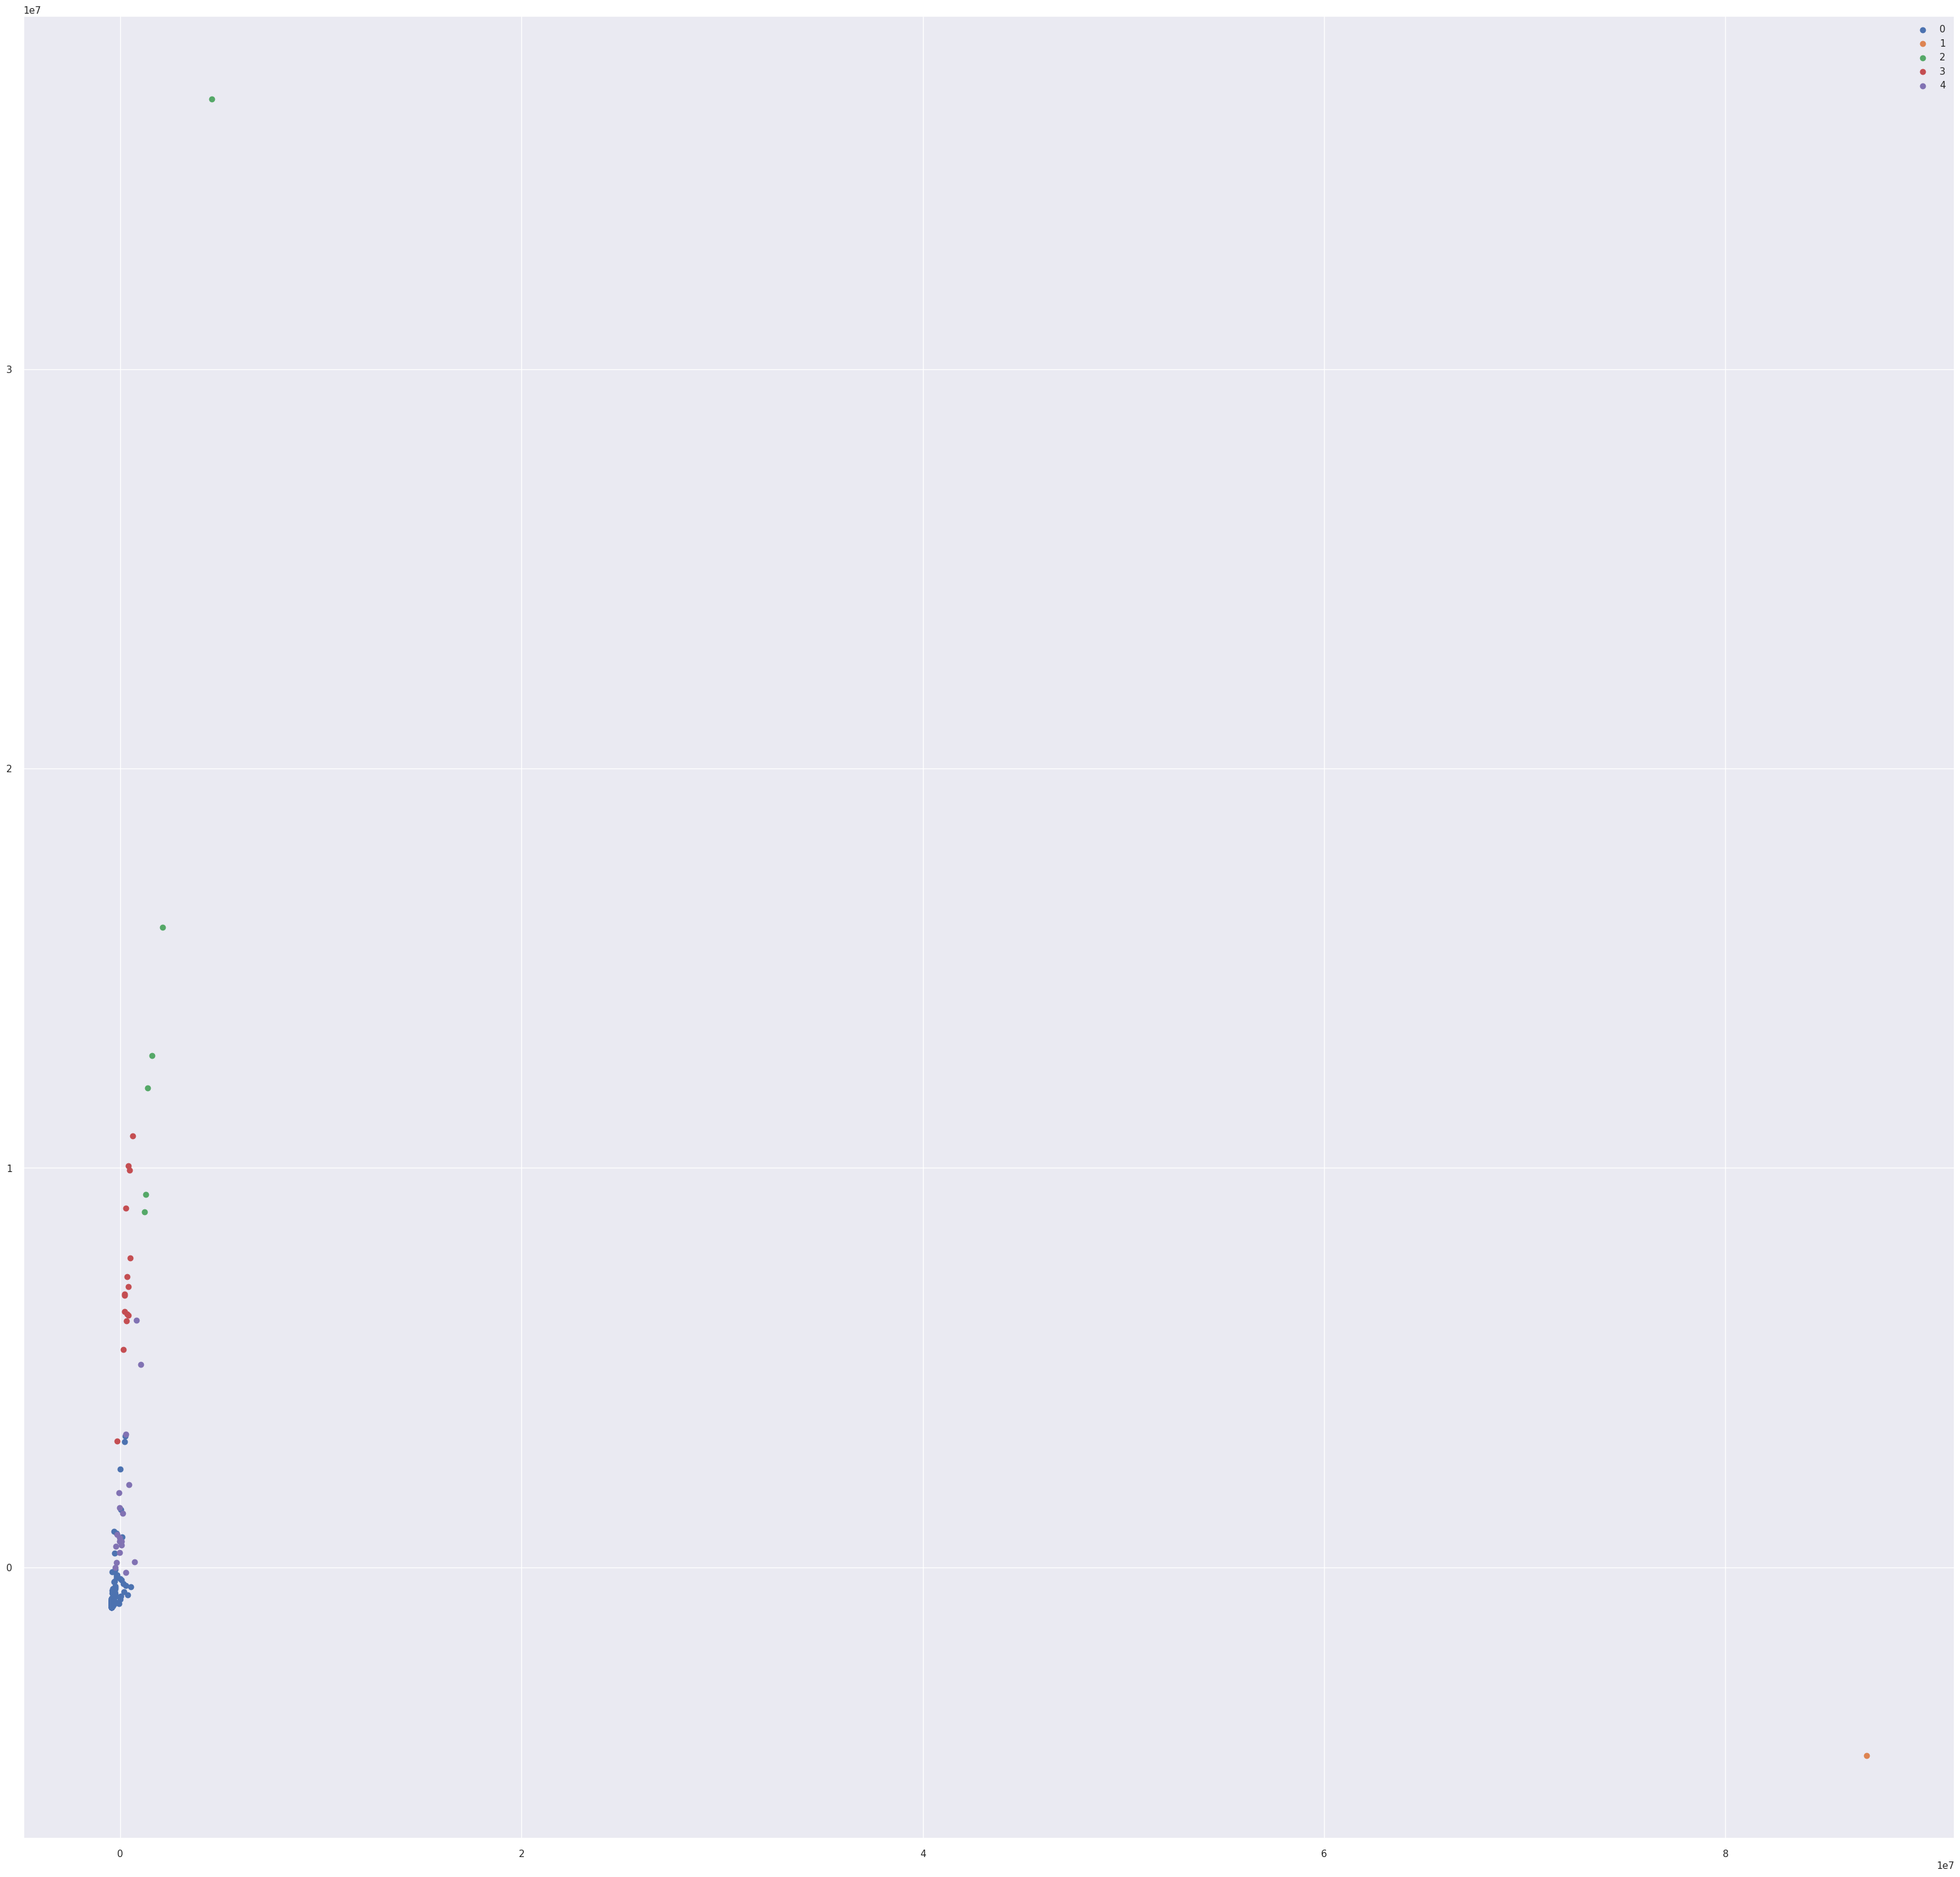

In [17]:
from sklearn.decomposition import PCA
#Ajustando a 5 k 
modelo_kmeans = KMeans(n_clusters=5)

# Ajusta el modelo a los datos
modelo_kmeans.fit(nonSupervised)

# Obtiene los clusters y los centroides
clusters = modelo_kmeans.labels_
centroides = modelo_kmeans.cluster_centers_

# Imprime los resultados
print("Clusters: ", clusters)
print("Centroides: ", centroides)

# Visualización de los clusters con PCA
pca = PCA(n_components=2)
datos_proyectados = pca.fit_transform(nonSupervised)
df = pd.DataFrame({'x': datos_proyectados[:,0], 'y': datos_proyectados[:,1], 'cluster': clusters})
grupos = df.groupby('cluster')
for name, group in grupos:
    plt.scatter(group.x, group.y, label=name)
plt.legend()
plt.show()

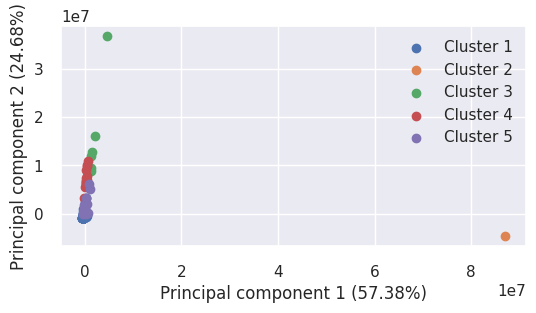

In [18]:
# Visualización de los clusters con PCA y varianzas en los ejes
fig = plt.figure(figsize=(6, 10))

ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")

for i in range(5):
    cluster = datos_proyectados[clusters == i]
    ax.scatter(cluster[:, 0], cluster[:, 1], label=f"Cluster {i+1}")

ax.set_xlabel(f"Principal component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
ax.set_ylabel(f"Principal component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
ax.legend()
plt.show()



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 1 1 1
 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4
 1 1 4 4 4 4 4 4 4 3 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 4 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Centroides:  [[7.33699833e-01 2.66300167e-01 7.28366667e-03 7.33839000e-01
  2.58877167e-01 8.96300000e-03 7.08540167e-01 2.57738167e-01
  2.47585000e-02 8.29833333e-03 7.12178333e-01 2.57120667e-01
  1.83105000e-02 4.09216667e-03 8.09466667e-03 7.01011500e-01
  2.20474333e-01 1.73665000e-02 3.24300000e-03 4.98098333e-02
  7.975333

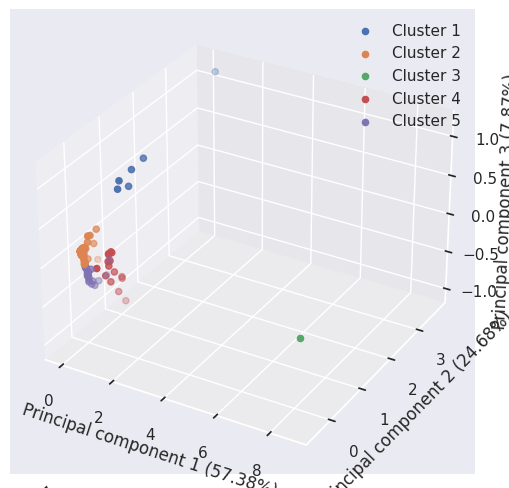

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#Ajustando a 5 k 
modelo_kmeans = KMeans(n_clusters=5)

# Ajusta el modelo a los datos
modelo_kmeans.fit(nonSupervised)

# Obtiene los clusters y los centroides
clusters = modelo_kmeans.labels_
centroides = modelo_kmeans.cluster_centers_

# Imprime los resultados
print("Clusters: ", clusters)
print("Centroides: ", centroides)

# Visualización de los clusters con PCA en 3D
pca = PCA(n_components=3)
datos_proyectados = pca.fit_transform(nonSupervised)

fig, ax = plt.subplots(figsize=(6, 10), subplot_kw={'projection': '3d'})

for i in range(5):
    cluster = datos_proyectados[clusters == i]
    ax.scatter(
        xs=cluster[:, 0], 
        ys=cluster[:, 1], 
        zs=cluster[:, 2], 
        label=f"Cluster {i+1}"
    )

ax.set_xlabel(f"Principal component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
ax.set_ylabel(f"Principal component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
ax.set_zlabel(f"Principal component 3 ({pca.explained_variance_ratio_[2]*100:.2f}%)")
ax.legend()
plt.show()

In [20]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
# Ajusta el modelo a los datos
modelo_kmeans.fit(nonSupervised)

# Obtiene los clusters y los centroides
clusters = modelo_kmeans.labels_
centroides = modelo_kmeans.cluster_centers_

# Calcula la suma de los cuadrados dentro del cluster (SSD)
ssd = 0
for i in range(5):
    cluster = nonSupervised[clusters == i]
    ssd += np.sum((cluster - centroides[i])**2)

print("La suma de los cuadrados dentro del cluster es:", ssd)

# Calcula el coeficiente de silueta de los clusters
coeficiente_silueta = silhouette_score(nonSupervised, clusters)
muestras_silueta = silhouette_samples(nonSupervised, clusters)

print("El coeficiente de silueta de los clusters es:", coeficiente_silueta)
print("Los valores de silueta de cada muestra son:", muestras_silueta)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


La suma de los cuadrados dentro del cluster es: K2.1                              2.686905e+01
K2.2                              2.686905e+01
K3.1                              1.681608e+01
K3.2                              3.684740e+01
K3.3                              2.639363e+01
                                      ...     
gene-CSN2|CSN2                    1.621286e+12
gene-LOC107987206|LOC107987206    4.381304e+09
gene-LOC112268313|LOC112268313    3.475561e+10
gene-ALB|ALB                      2.864870e+12
06S10197329_S4_L001.39174|ND6     2.479872e+11
Length: 111, dtype: float64
El coeficiente de silueta de los clusters es: 0.7733330694398932
Los valores de silueta de cada muestra son: [ 0.88397351  0.8834632   0.88592185  0.8858445   0.88587086  0.88586497
  0.88876312  0.88877608  0.88877452  0.88865488  0.89124026  0.88942182
  0.8912636   0.89125275  0.88792782  0.88780987  0.88800718  0.88808289
 -0.13087817  0.36151815  0.46425061  0.23756079  0.32971864  0.21523535
  0.40

In [21]:
# Análisis de la validez de los clusters con siluetas
puntuacion_silueta = silhouette_score(nonSupervised, clusters)
print("Puntuación de silueta: %.4f" % puntuacion_silueta)

Puntuación de silueta: 0.7733


# Los outliers del cluster 3 corresponden a SRR10804438 y SRR10804439, ambas african american. Entonces voy a correr otra vez quitando ancestría a ver si cambia

In [22]:
breast_cancer.head()

K2.1      K2.2      K3.1      K3.2      K3.3      K4.1      K4.2  \
0  0.968868  0.031132  0.037672  0.936120  0.026208  0.048288  0.923092   
1  0.967888  0.032112  0.033182  0.939076  0.027742  0.042181  0.929105   
2  0.964684  0.035316  0.000010  0.974376  0.025614  0.000010  0.972885   
3  0.963306  0.036694  0.000010  0.972688  0.027302  0.000010  0.972126   
4  0.961074  0.038926  0.000010  0.971778  0.028212  0.000010  0.971502   

       K4.3     K4.4      K5.1  ...  gene-RNA45SN1|RNA45SN1  gene-FTH1|FTH1  \
0  0.028610  0.00001  0.045163  ...              6261.61082     59290.55966   
1  0.028703  0.00001  0.030383  ...              6929.56600     59863.82000   
2  0.027095  0.00001  0.000010  ...              5168.23900     48685.06000   
3  0.027854  0.00001  0.000010  ...              4860.65197     48301.70084   
4  0.028478  0.00001  0.000010  ...              4714.93133     48008.90622   

   gene-HSP90AA1|HSP90AA1  gene-LALBA|LALBA  gene-CSN2|CSN2  \
0             28868.86395               0.0             0.0   
1             29804.24000               0.0             0.0   
2            148613.40000               0.0             0.0   
3            148214.56493               0.0             0.0   
4            146690.72358               0.0             0.0   

   gene-LOC107987206|LOC107987206  gene-LOC112268313|LOC112268313  \
0                             0.0                       443.17921   
1                             0.0                       441.47100   
2                             0.0                       257.61280   
3                             0.0                       275.78854   
4                             0.0                       252.92926   

   gene-ALB|ALB  06S10197329_S4_L001.39174|ND6  subtype  
0      13.63628                       33.23844     LumB  
1      10.78951                       25.17553     LumB  
2       0.00000                       39.48809     LumB  
3      11.61215                       50.31931     LumB  
4      11.91333                       43.98770     LumB  

[5 rows x 112 columns]

In [23]:
#Eliminar valores de K 

breast_cancer= breast_cancer.drop('K2.1',axis=1)
breast_cancer= breast_cancer.drop('K2.2', axis=1)
breast_cancer= breast_cancer.drop('K3.1', axis=1)
breast_cancer= breast_cancer.drop('K3.2', axis=1)
breast_cancer= breast_cancer.drop('K3.3', axis=1)
breast_cancer= breast_cancer.drop('K4.1', axis=1)
breast_cancer= breast_cancer.drop('K4.2',axis=1)
breast_cancer= breast_cancer.drop('K4.3', axis=1)
breast_cancer= breast_cancer.drop('K4.4', axis=1)
breast_cancer= breast_cancer.drop('K5.1', axis=1)
breast_cancer= breast_cancer.drop('K5.2', axis=1)
breast_cancer= breast_cancer.drop('K5.3', axis=1)
breast_cancer= breast_cancer.drop('K5.4', axis=1)
breast_cancer= breast_cancer.drop('K5.5',axis=1)
breast_cancer= breast_cancer.drop('K6.1', axis=1)
breast_cancer= breast_cancer.drop('K6.2', axis=1)
breast_cancer= breast_cancer.drop('K6.3', axis=1)
breast_cancer= breast_cancer.drop('K6.4', axis=1)
breast_cancer= breast_cancer.drop('K6.5', axis=1)
breast_cancer= breast_cancer.drop('K6.6', axis=1)
breast_cancer= breast_cancer.drop('K7.1', axis=1)
breast_cancer= breast_cancer.drop('K7.2', axis=1)
breast_cancer= breast_cancer.drop('K7.3', axis=1)
breast_cancer= breast_cancer.drop('K7.4', axis=1)
breast_cancer= breast_cancer.drop('K7.5', axis=1)
breast_cancer= breast_cancer.drop('K7.6', axis=1)
breast_cancer= breast_cancer.drop('K7.7', axis=1)
breast_cancer= breast_cancer.drop('K8.1', axis=1)
breast_cancer= breast_cancer.drop('K8.2', axis=1)
breast_cancer= breast_cancer.drop('K8.3', axis=1)
breast_cancer= breast_cancer.drop('K8.4', axis=1)
breast_cancer= breast_cancer.drop('K8.5', axis=1)
breast_cancer= breast_cancer.drop('K8.6', axis=1)
breast_cancer= breast_cancer.drop('K8.7', axis=1)
breast_cancer= breast_cancer.drop('K8.8', axis=1)
breast_cancer= breast_cancer.drop('K9.1', axis=1)
breast_cancer= breast_cancer.drop('K9.2', axis=1)
breast_cancer= breast_cancer.drop('K9.3', axis=1)
breast_cancer= breast_cancer.drop('K9.4', axis=1)
breast_cancer= breast_cancer.drop('K9.5', axis=1)
breast_cancer= breast_cancer.drop('K9.6', axis=1)
breast_cancer= breast_cancer.drop('K9.7', axis=1)
breast_cancer= breast_cancer.drop('K9.8', axis=1)
breast_cancer= breast_cancer.drop('K9.9', axis=1)
breast_cancer= breast_cancer.drop('K10.1', axis=1)
breast_cancer= breast_cancer.drop('K10.2', axis=1)
breast_cancer= breast_cancer.drop('K10.3', axis=1)
breast_cancer= breast_cancer.drop('K10.4', axis=1)
breast_cancer= breast_cancer.drop('K10.5', axis=1)
breast_cancer= breast_cancer.drop('K10.6', axis=1)
breast_cancer= breast_cancer.drop('K10.7', axis=1)
breast_cancer= breast_cancer.drop('K10.8', axis=1)
breast_cancer= breast_cancer.drop('K10.9', axis=1)
breast_cancer= breast_cancer.drop('K10.10', axis=1)
breast_cancer.head()


gene-ACTG1|ACTG1  gene-LOC105378179|LOC105378179  \
0       72567.18596                           0.000   
1       75016.80000                           0.000   
2       91339.72000                         595.142   
3       92308.84195                           0.000   
4       92111.15505                           0.000   

   06S10197329_S4_L001.39175|CYTB  gene-COL1A2|COL1A2  gene-NEAT1|NEAT1  \
0                       114.20387        159357.01537          67.32915   
1                       134.86890        165655.90000          84.51786   
2                       136.32790         65774.94000          96.83985   
3                        92.89719         65806.04755          83.22040   
4                       152.12412         64541.86562          69.64719   

   gene-AHNAK|AHNAK  gene-TALAM1|TALAM1  gene-RN7SL1|RN7SL1  gene-IST|IST  \
0       74045.01816             0.00000           581.24657   43752.01487   
1       76579.48000             0.00000           641.07700   47280.55000   
2       71704.74000             0.00000           402.40250   21282.20000   
3       72018.54719             0.00000           458.67988   20833.16272   
4       71427.77310          3114.87883           414.21749   20599.98860   

   gene-SLCO5A1|SLCO5A1  ...  gene-RNA45SN1|RNA45SN1  gene-FTH1|FTH1  \
0             205.39652  ...              6261.61082     59290.55966   
1             215.79030  ...              6929.56600     59863.82000   
2             272.65590  ...              5168.23900     48685.06000   
3             268.04710  ...              4860.65197     48301.70084   
4             286.83644  ...              4714.93133     48008.90622   

   gene-HSP90AA1|HSP90AA1  gene-LALBA|LALBA  gene-CSN2|CSN2  \
0             28868.86395               0.0             0.0   
1             29804.24000               0.0             0.0   
2            148613.40000               0.0             0.0   
3            148214.56493               0.0             0.0   
4            146690.72358               0.0             0.0   

   gene-LOC107987206|LOC107987206  gene-LOC112268313|LOC112268313  \
0                             0.0                       443.17921   
1                             0.0                       441.47100   
2                             0.0                       257.61280   
3                             0.0                       275.78854   
4                             0.0                       252.92926   

   gene-ALB|ALB  06S10197329_S4_L001.39174|ND6  subtype  
0      13.63628                       33.23844     LumB  
1      10.78951                       25.17553     LumB  
2       0.00000                       39.48809     LumB  
3      11.61215                       50.31931     LumB  
4      11.91333                       43.98770     LumB  

[5 rows x 58 columns]

In [24]:
#Eliminar labels de subtypo 
JustGeneExpression = breast_cancer.drop('subtype', axis=1)
JustGeneExpression.head()

gene-ACTG1|ACTG1  gene-LOC105378179|LOC105378179  \
0       72567.18596                           0.000   
1       75016.80000                           0.000   
2       91339.72000                         595.142   
3       92308.84195                           0.000   
4       92111.15505                           0.000   

   06S10197329_S4_L001.39175|CYTB  gene-COL1A2|COL1A2  gene-NEAT1|NEAT1  \
0                       114.20387        159357.01537          67.32915   
1                       134.86890        165655.90000          84.51786   
2                       136.32790         65774.94000          96.83985   
3                        92.89719         65806.04755          83.22040   
4                       152.12412         64541.86562          69.64719   

   gene-AHNAK|AHNAK  gene-TALAM1|TALAM1  gene-RN7SL1|RN7SL1  gene-IST|IST  \
0       74045.01816             0.00000           581.24657   43752.01487   
1       76579.48000             0.00000           641.07700   47280.55000   
2       71704.74000             0.00000           402.40250   21282.20000   
3       72018.54719             0.00000           458.67988   20833.16272   
4       71427.77310          3114.87883           414.21749   20599.98860   

   gene-SLCO5A1|SLCO5A1  ...  gene-LOC112268284|LOC112268284  \
0             205.39652  ...                        0.000000   
1             215.79030  ...                        0.899126   
2             272.65590  ...                        0.000000   
3             268.04710  ...                        0.000000   
4             286.83644  ...                        0.000000   

   gene-RNA45SN1|RNA45SN1  gene-FTH1|FTH1  gene-HSP90AA1|HSP90AA1  \
0              6261.61082     59290.55966             28868.86395   
1              6929.56600     59863.82000             29804.24000   
2              5168.23900     48685.06000            148613.40000   
3              4860.65197     48301.70084            148214.56493   
4              4714.93133     48008.90622            146690.72358   

   gene-LALBA|LALBA  gene-CSN2|CSN2  gene-LOC107987206|LOC107987206  \
0               0.0             0.0                             0.0   
1               0.0             0.0                             0.0   
2               0.0             0.0                             0.0   
3               0.0             0.0                             0.0   
4               0.0             0.0                             0.0   

   gene-LOC112268313|LOC112268313  gene-ALB|ALB  06S10197329_S4_L001.39174|ND6  
0                       443.17921      13.63628                       33.23844  
1                       441.47100      10.78951                       25.17553  
2                       257.61280       0.00000                       39.48809  
3                       275.78854      11.61215                       50.31931  
4                       252.92926      11.91333                       43.98770  

[5 rows x 57 columns]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

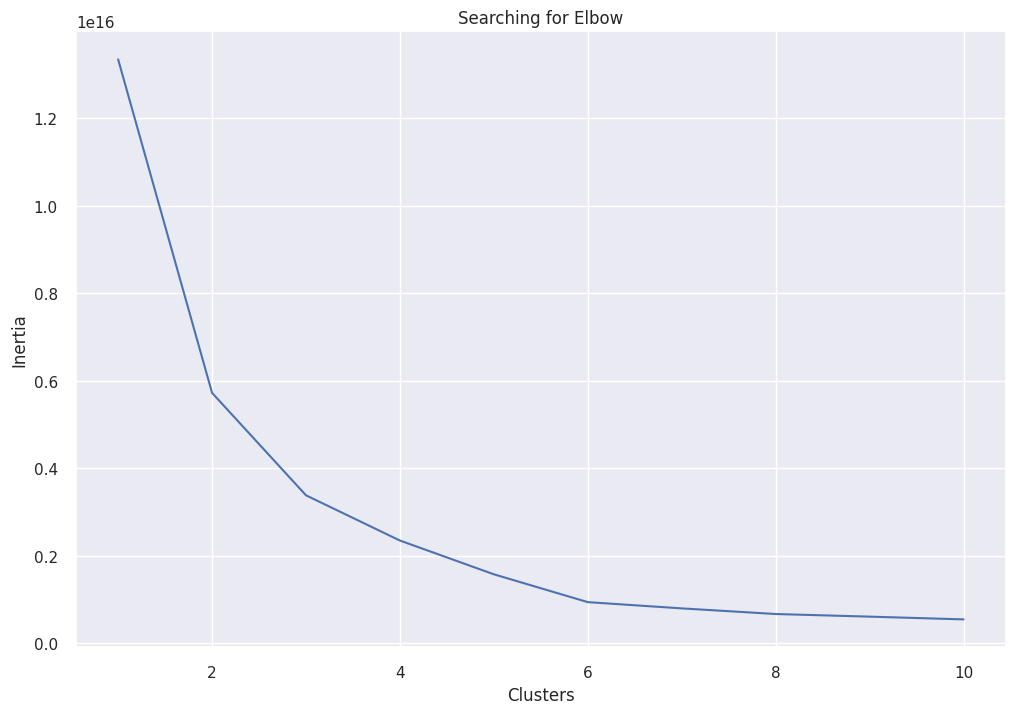

In [25]:
#Repetir el codo que me había pasado JP
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(JustGeneExpression)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

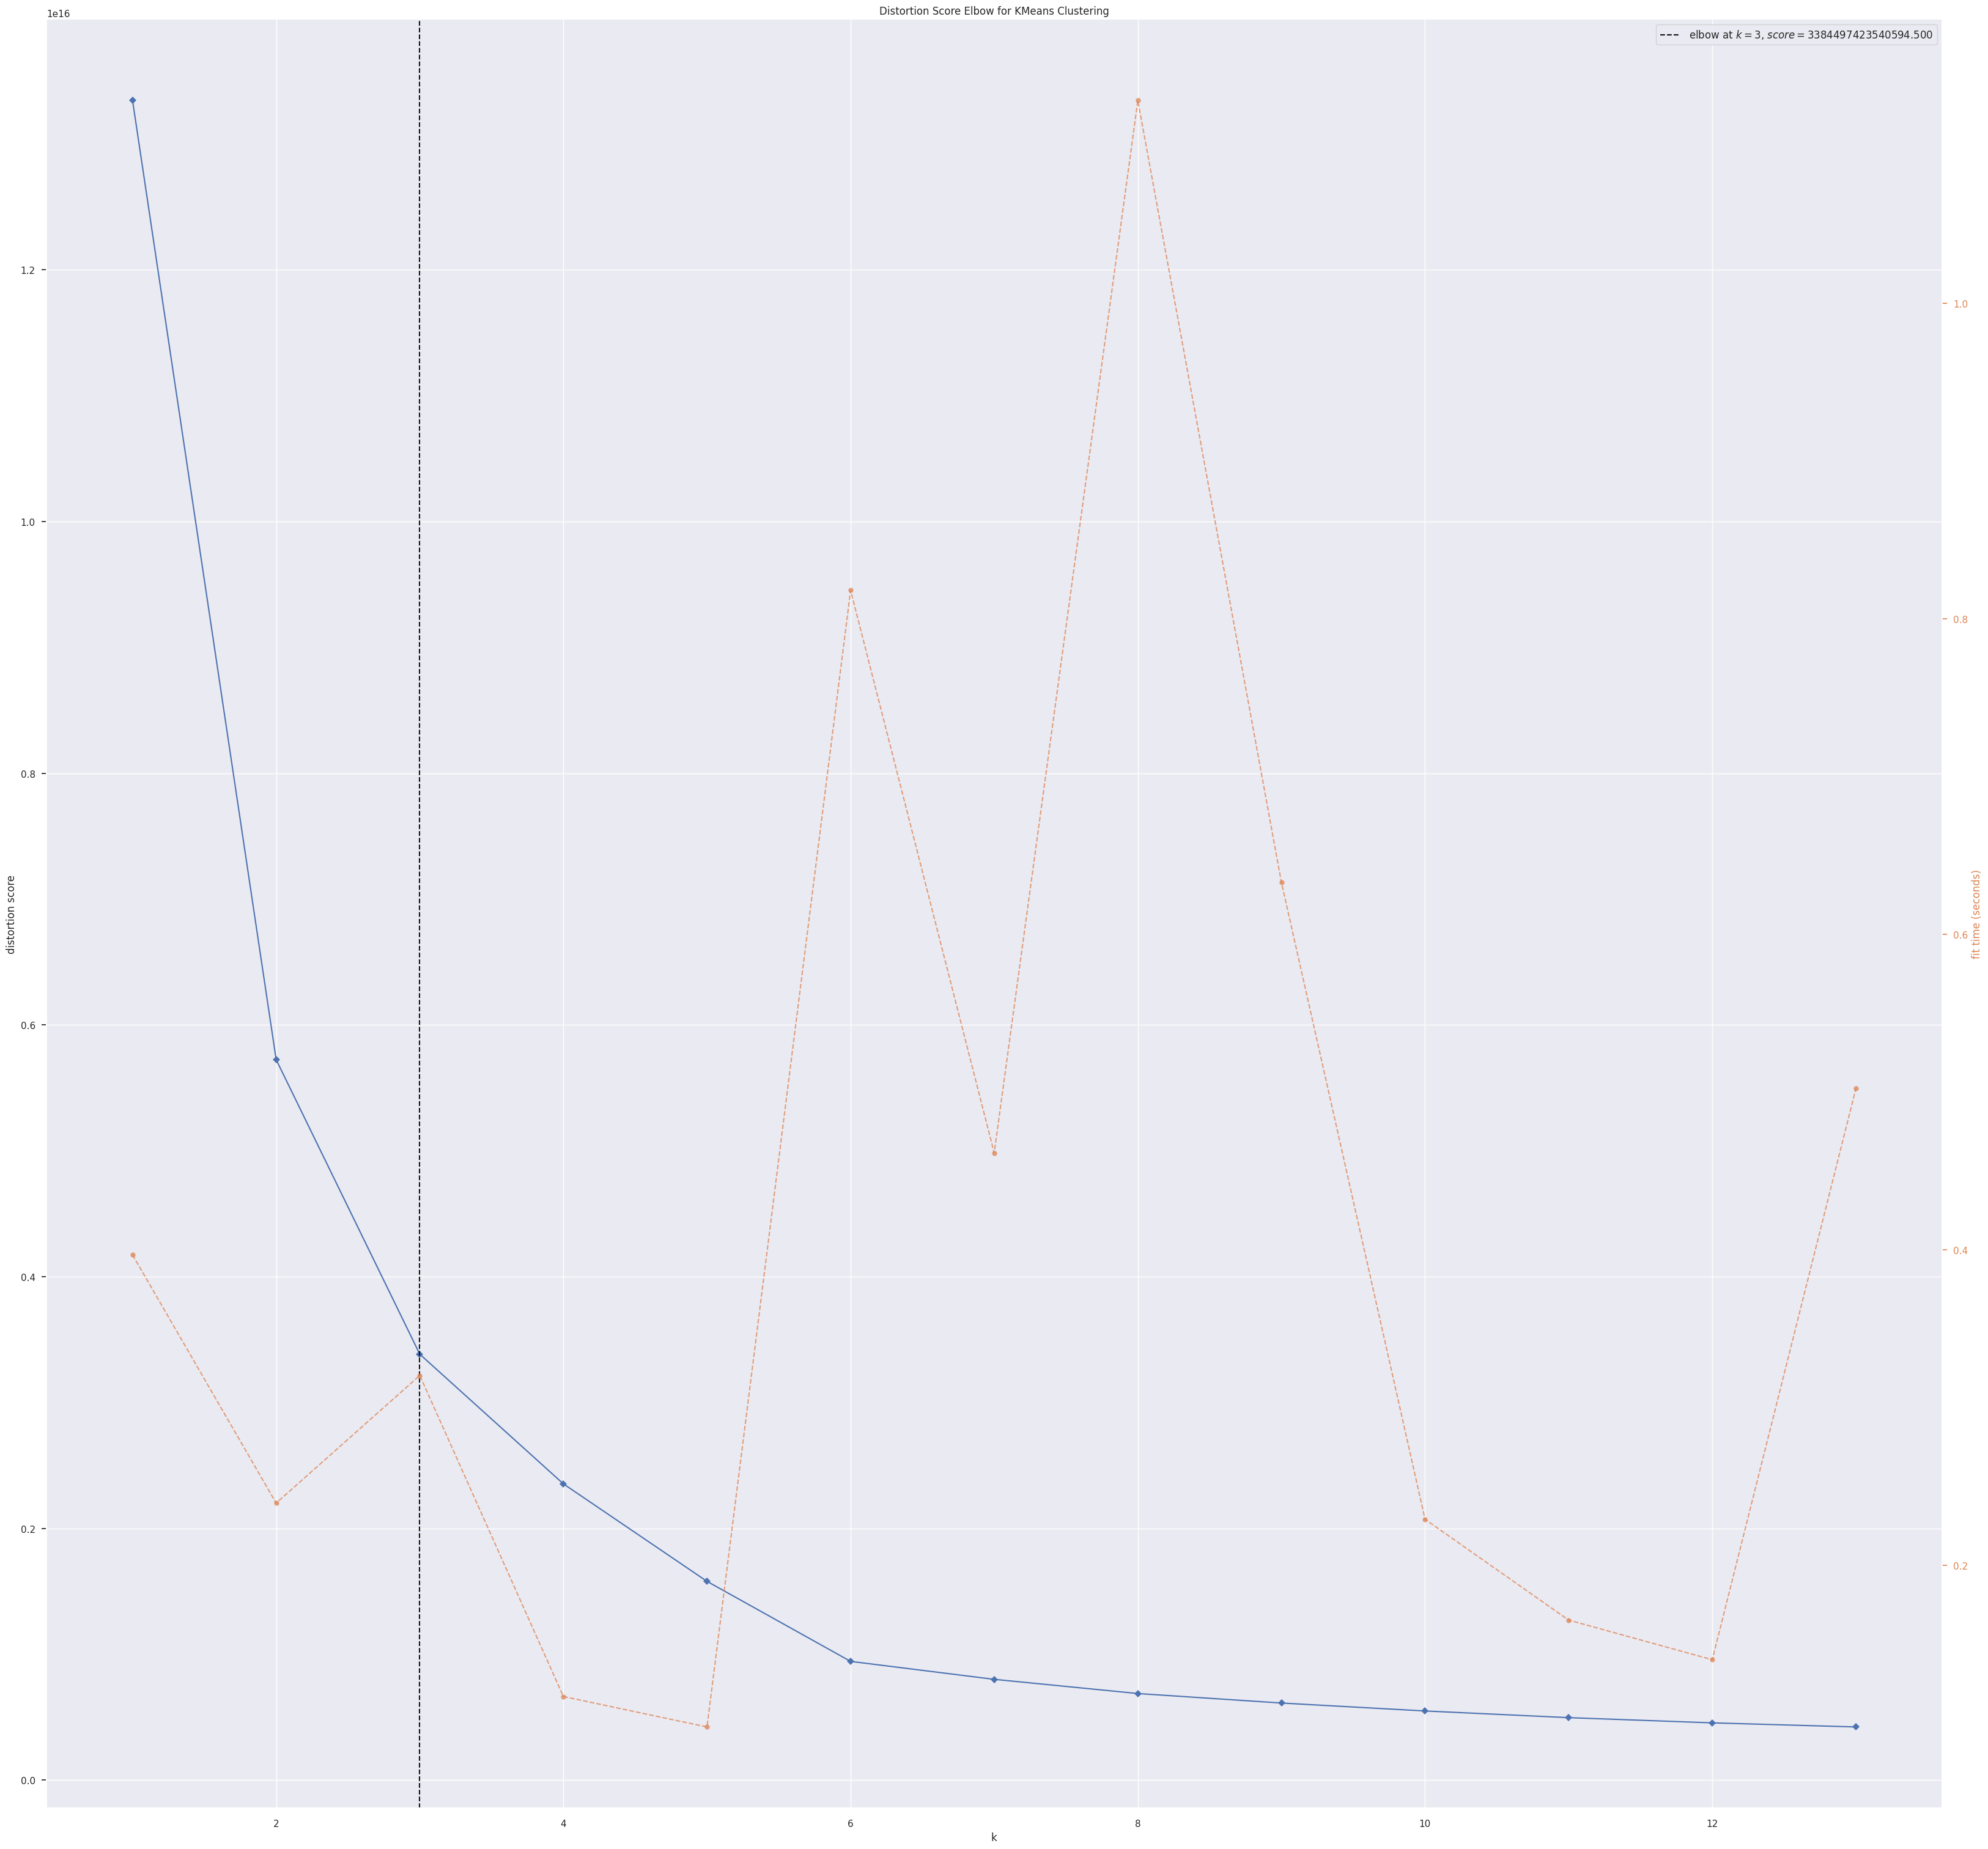

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
#Ver la otra visualización de codo 
!pip install yellowbrick 

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#Instantiate the clustering model and visualizer 
km = KMeans(random_state=33)
visualizer = KElbowVisualizer(km, k=(1,14))
visualizer.fit(JustGeneExpression)
visualizer.show() 

<Axes: >

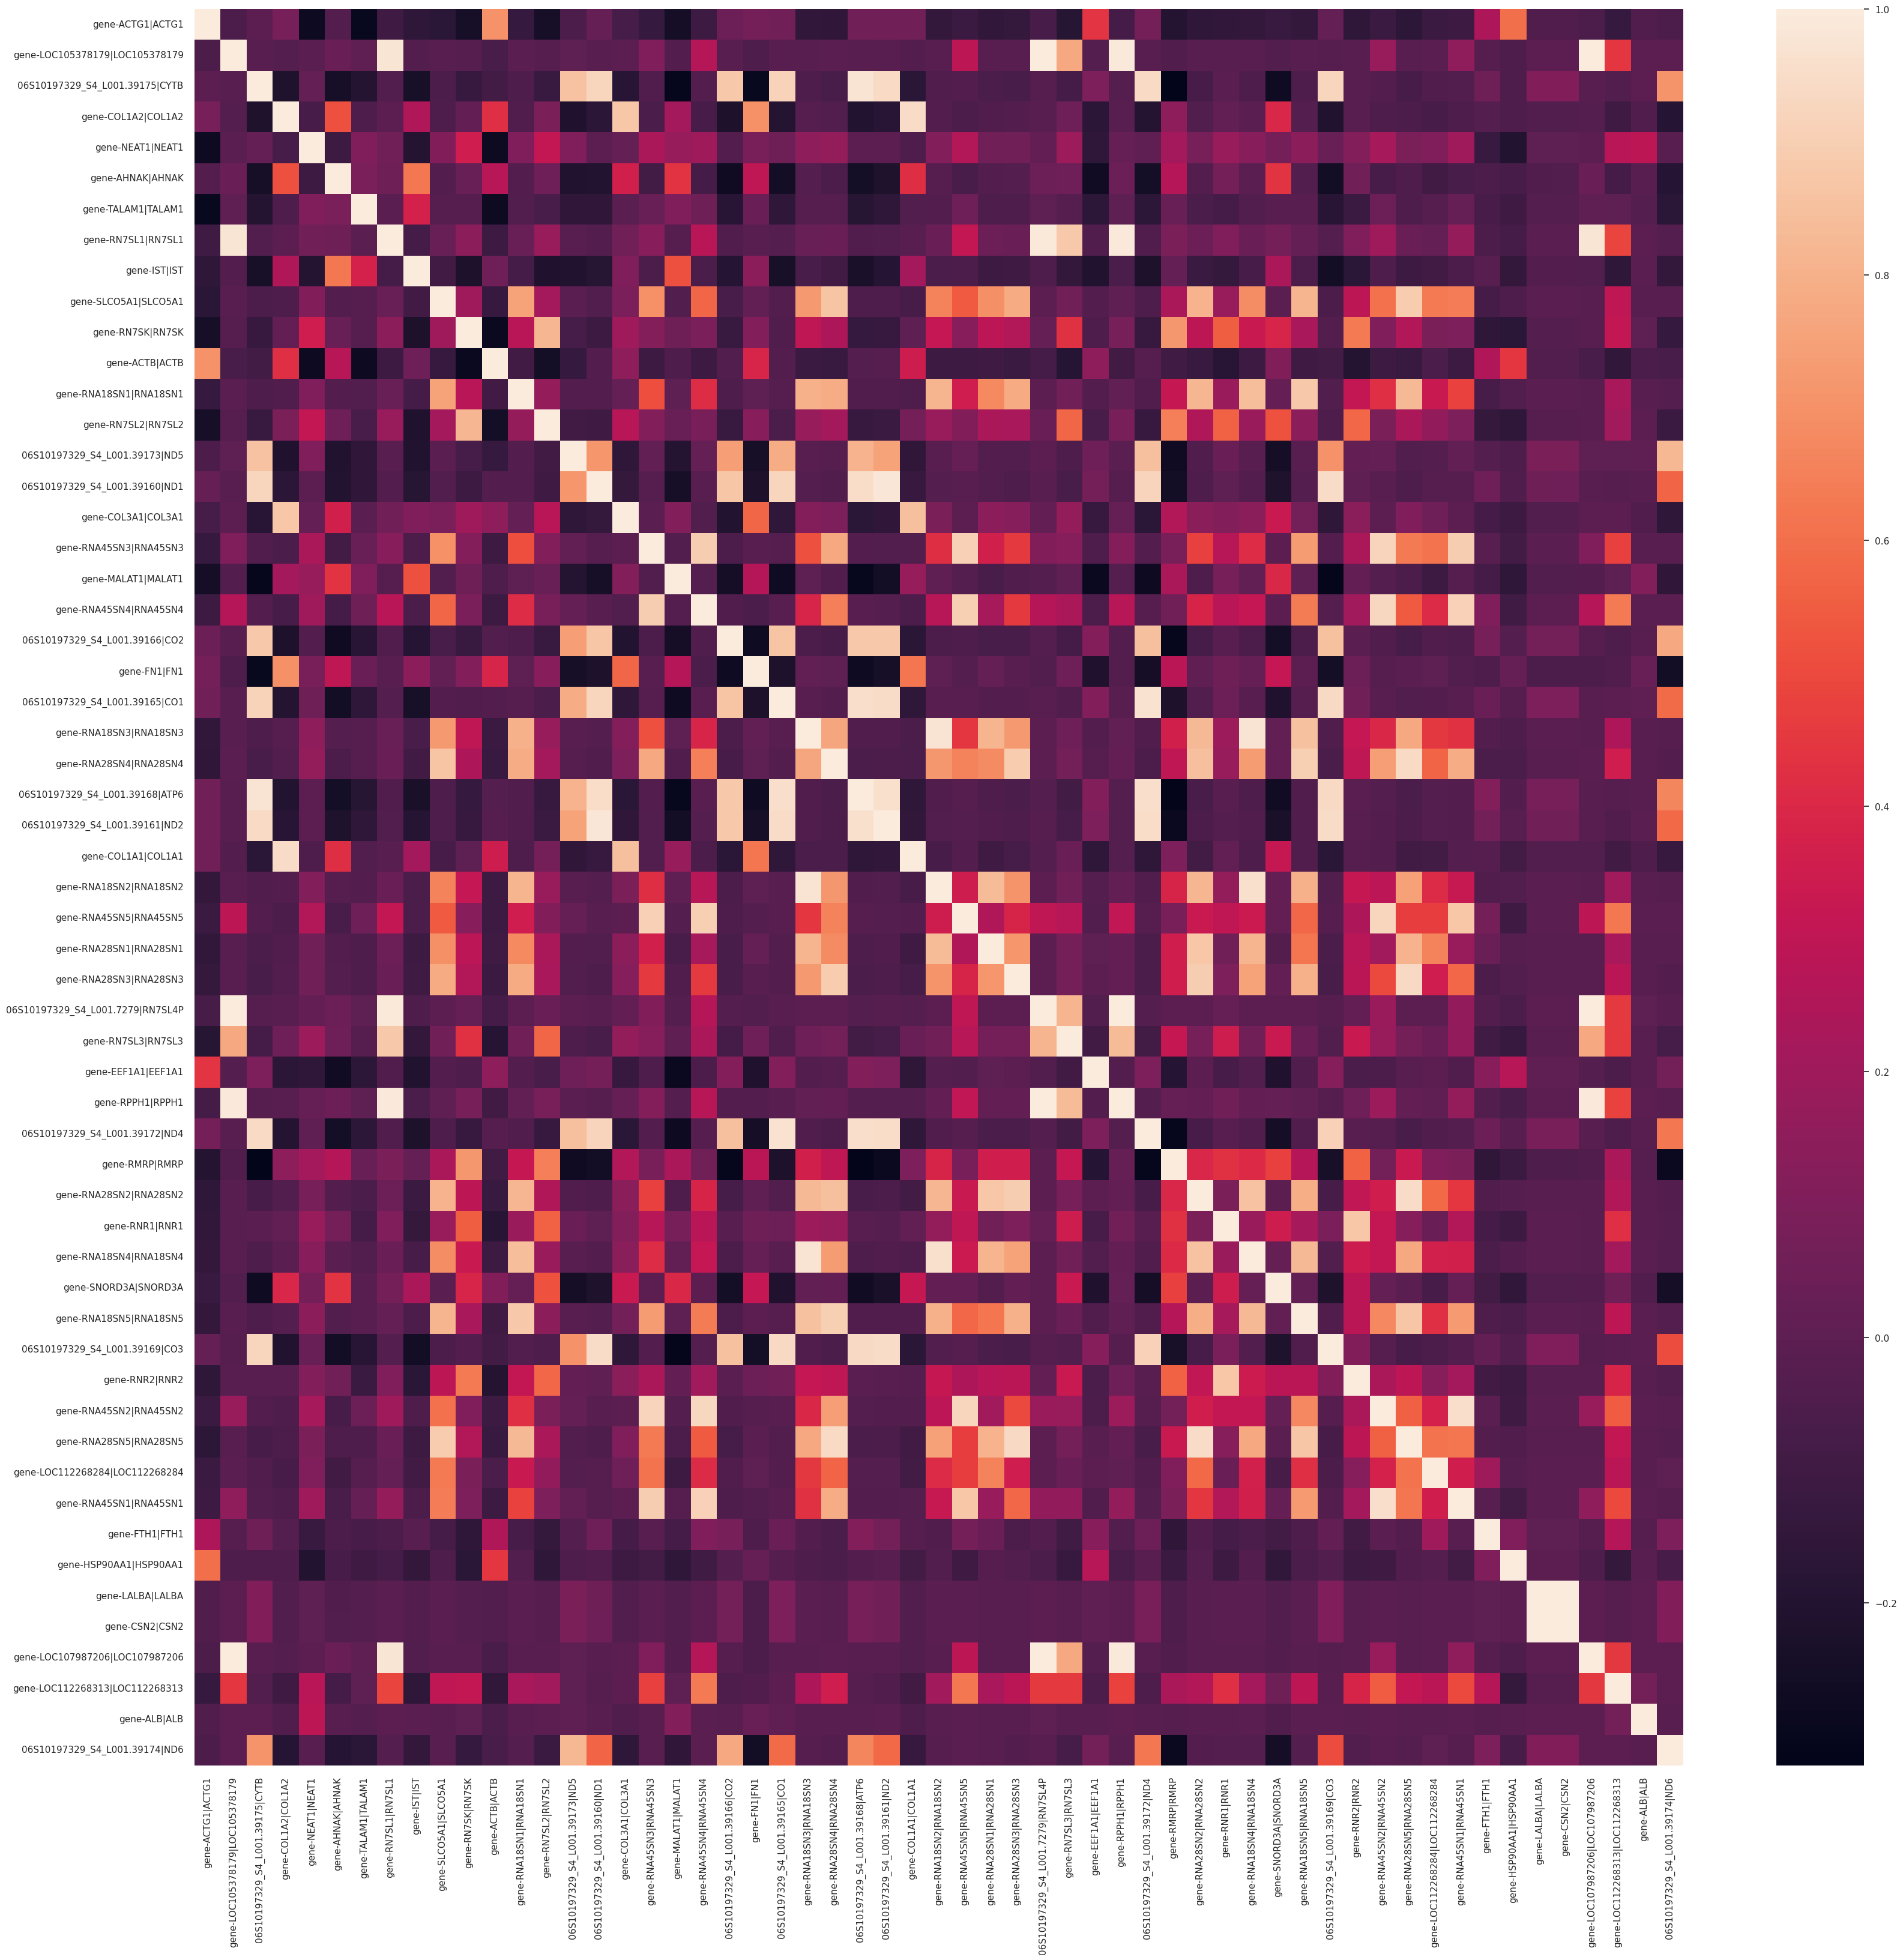

In [27]:
#Pero solo toma en cuenta las primeras columnas, entonces hagamos correlación para ver las 3 mas correlacionadas y repetir el grafico 
corr_matrix = JustGeneExpression.corr()
sns.set(rc={'figure.figsize':(40,38)})
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

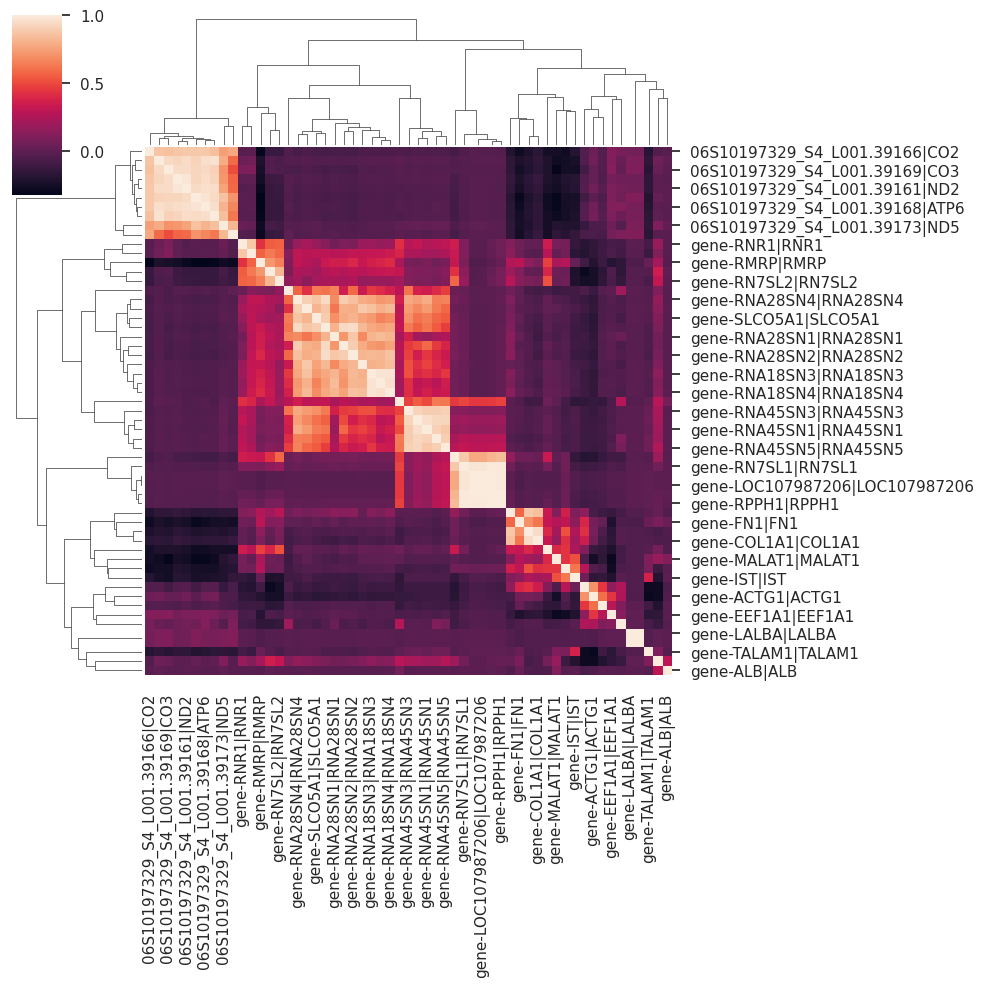

In [28]:
#Aca quería crear clusters para elegir los 3 mejores pero no sirvió 
sns.set(rc={'figure.figsize':(40,38)})
sns.clustermap(corr_matrix)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 2 2 2 2
 2 2 4 4 4 4 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0
 2 2 0 0 0 0 0 0 0 3 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Centroides:  [[9.99540250e-01 4.59750000e-04 2.87125000e-04 9.99702875e-01
  1.00000000e-05 2.11156250e-03 9.71273188e-01 1.00000000e-05
  2.66052500e-02 1.42268750e-03 9.76582687e-01 1.00000000e-05
  1.84888750e-02 3.49575000e-03 1.22337500e-03 9.77711625e-01
  1.00000000e-05 1.74948750e-02 3.55012500e-03 1.00000000e-05
  4.470625

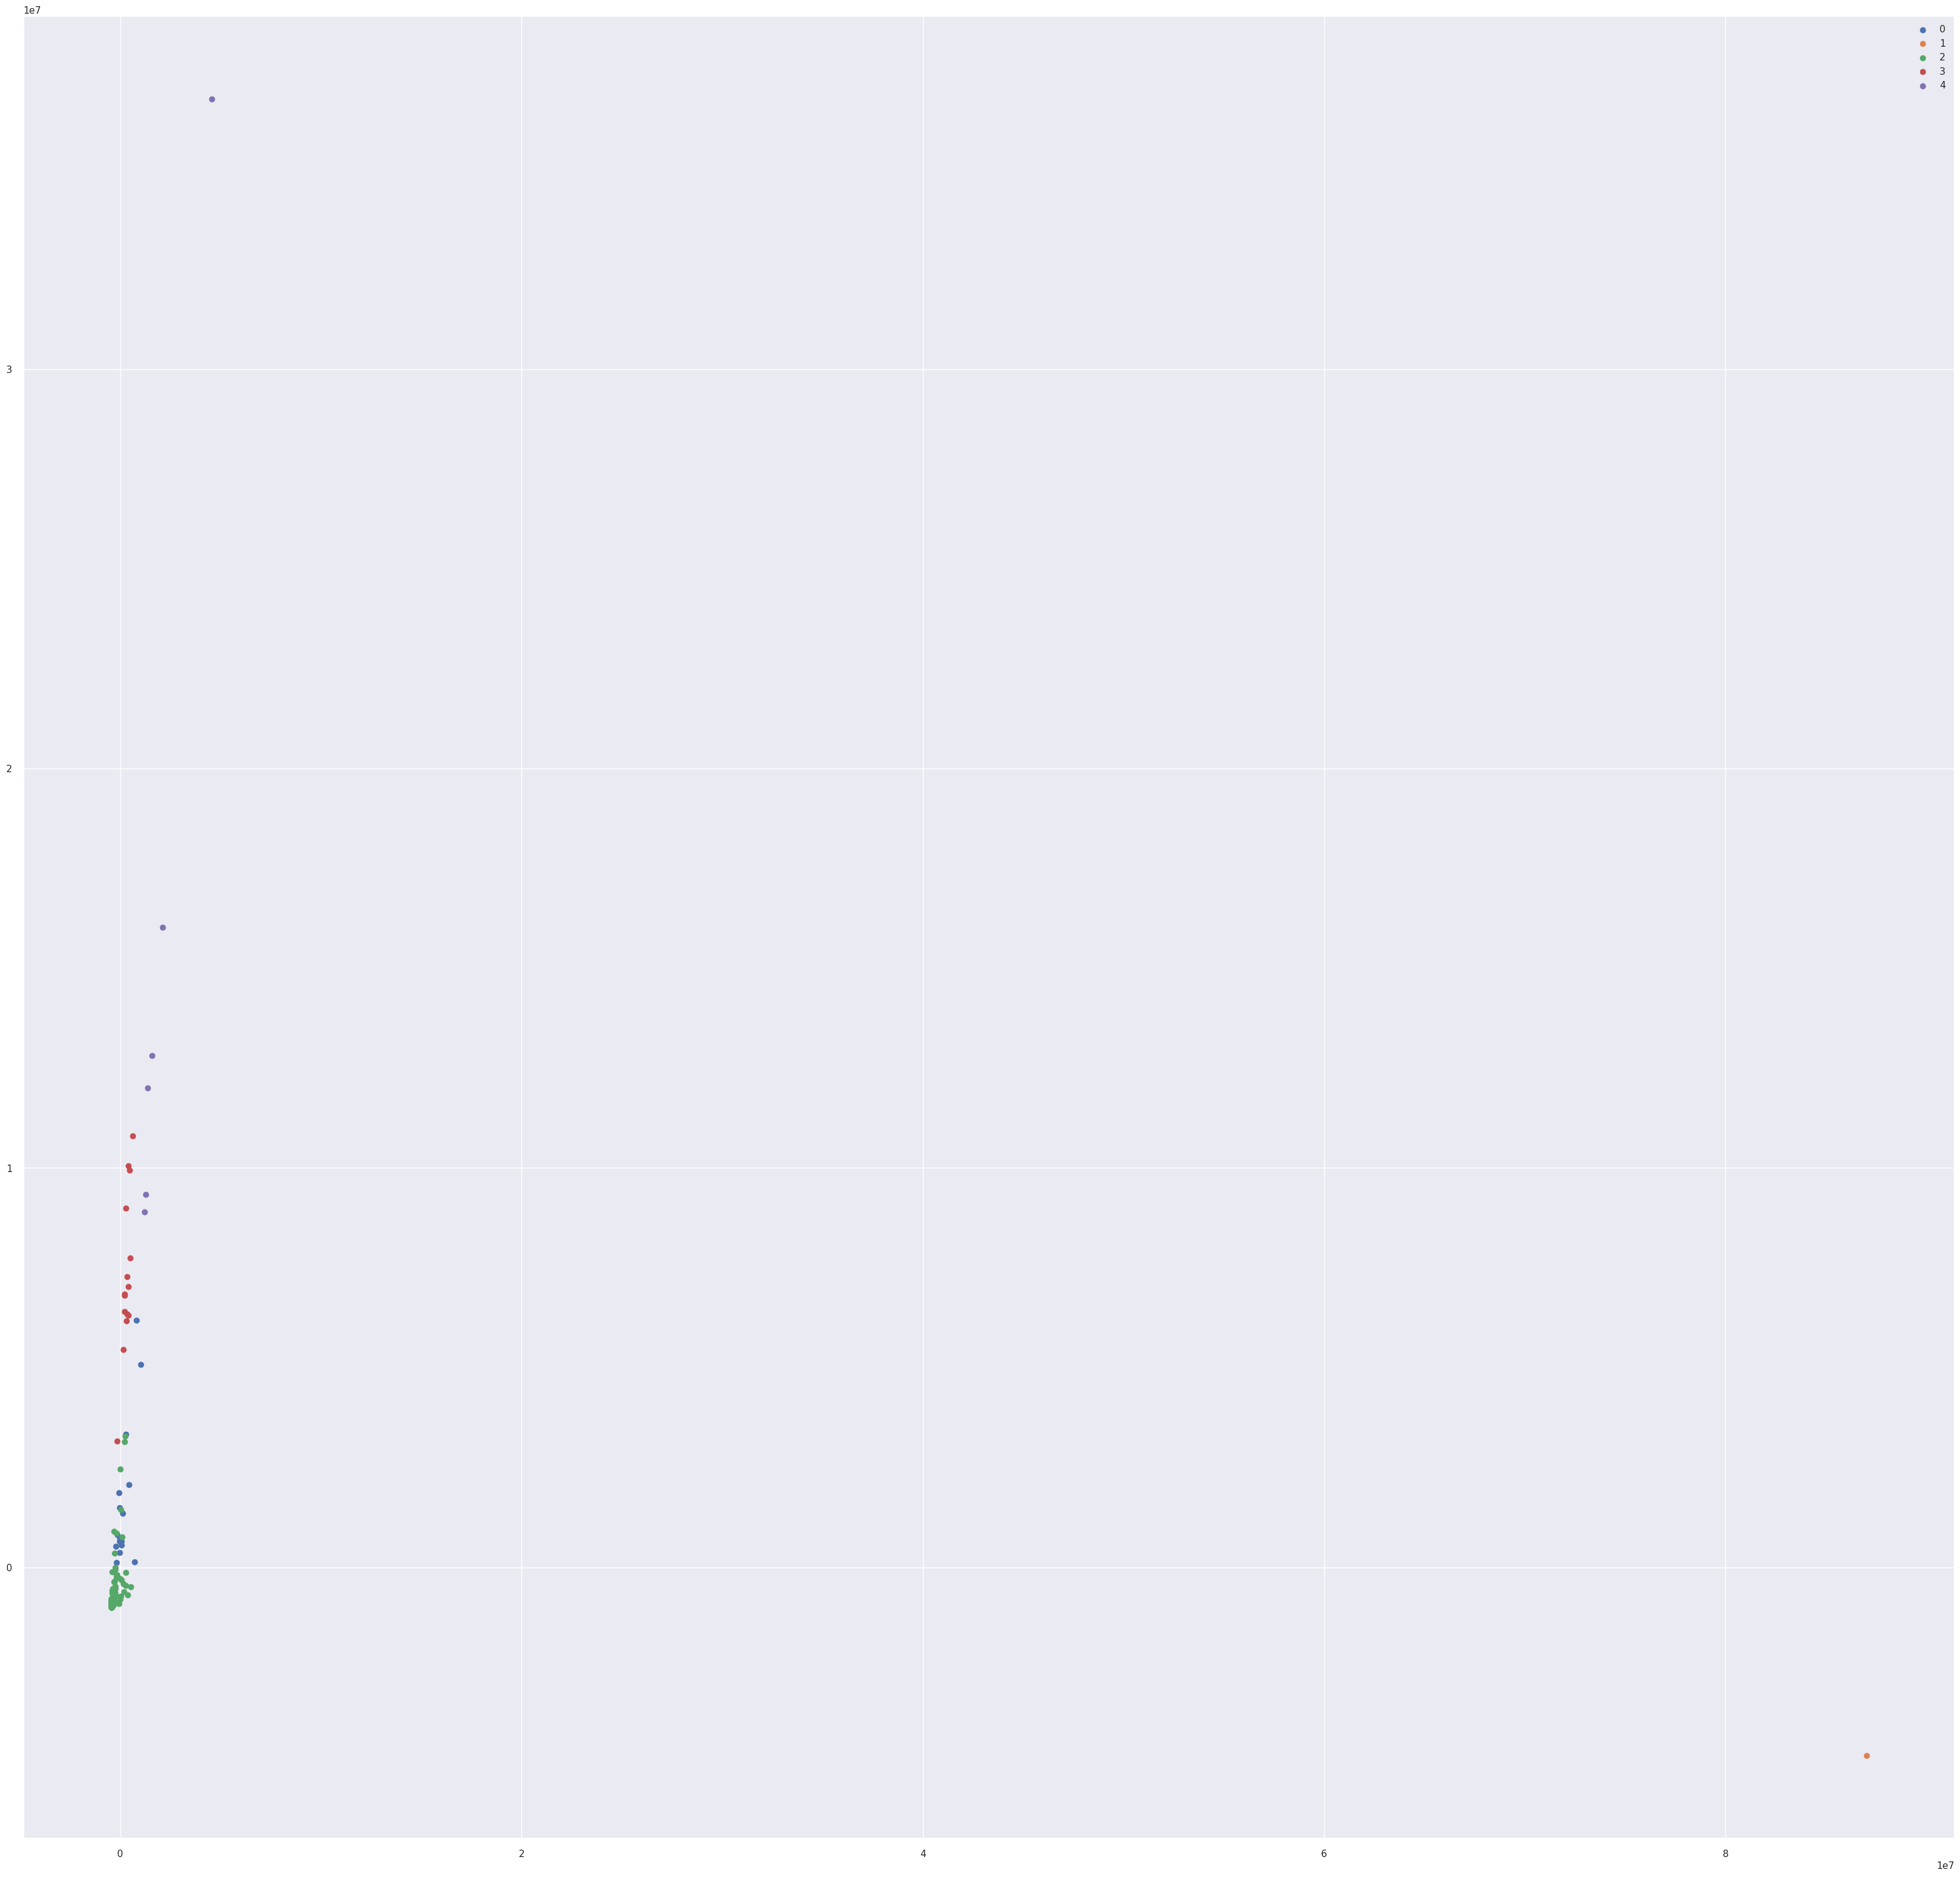

In [29]:
from sklearn.decomposition import PCA
#Ajustando a 5 k 
modelo_kmeans = KMeans(n_clusters=5)

# Ajusta el modelo a los datos
modelo_kmeans.fit(nonSupervised)

# Obtiene los clusters y los centroides
clusters = modelo_kmeans.labels_
centroides = modelo_kmeans.cluster_centers_

# Imprime los resultados
print("Clusters: ", clusters)
print("Centroides: ", centroides)

# Visualización de los clusters con PCA
pca = PCA(n_components=2)
datos_proyectados = pca.fit_transform(nonSupervised)
df = pd.DataFrame({'x': datos_proyectados[:,0], 'y': datos_proyectados[:,1], 'cluster': clusters})
grupos = df.groupby('cluster')
for name, group in grupos:
    plt.scatter(group.x, group.y, label=name)
plt.legend()
plt.show()

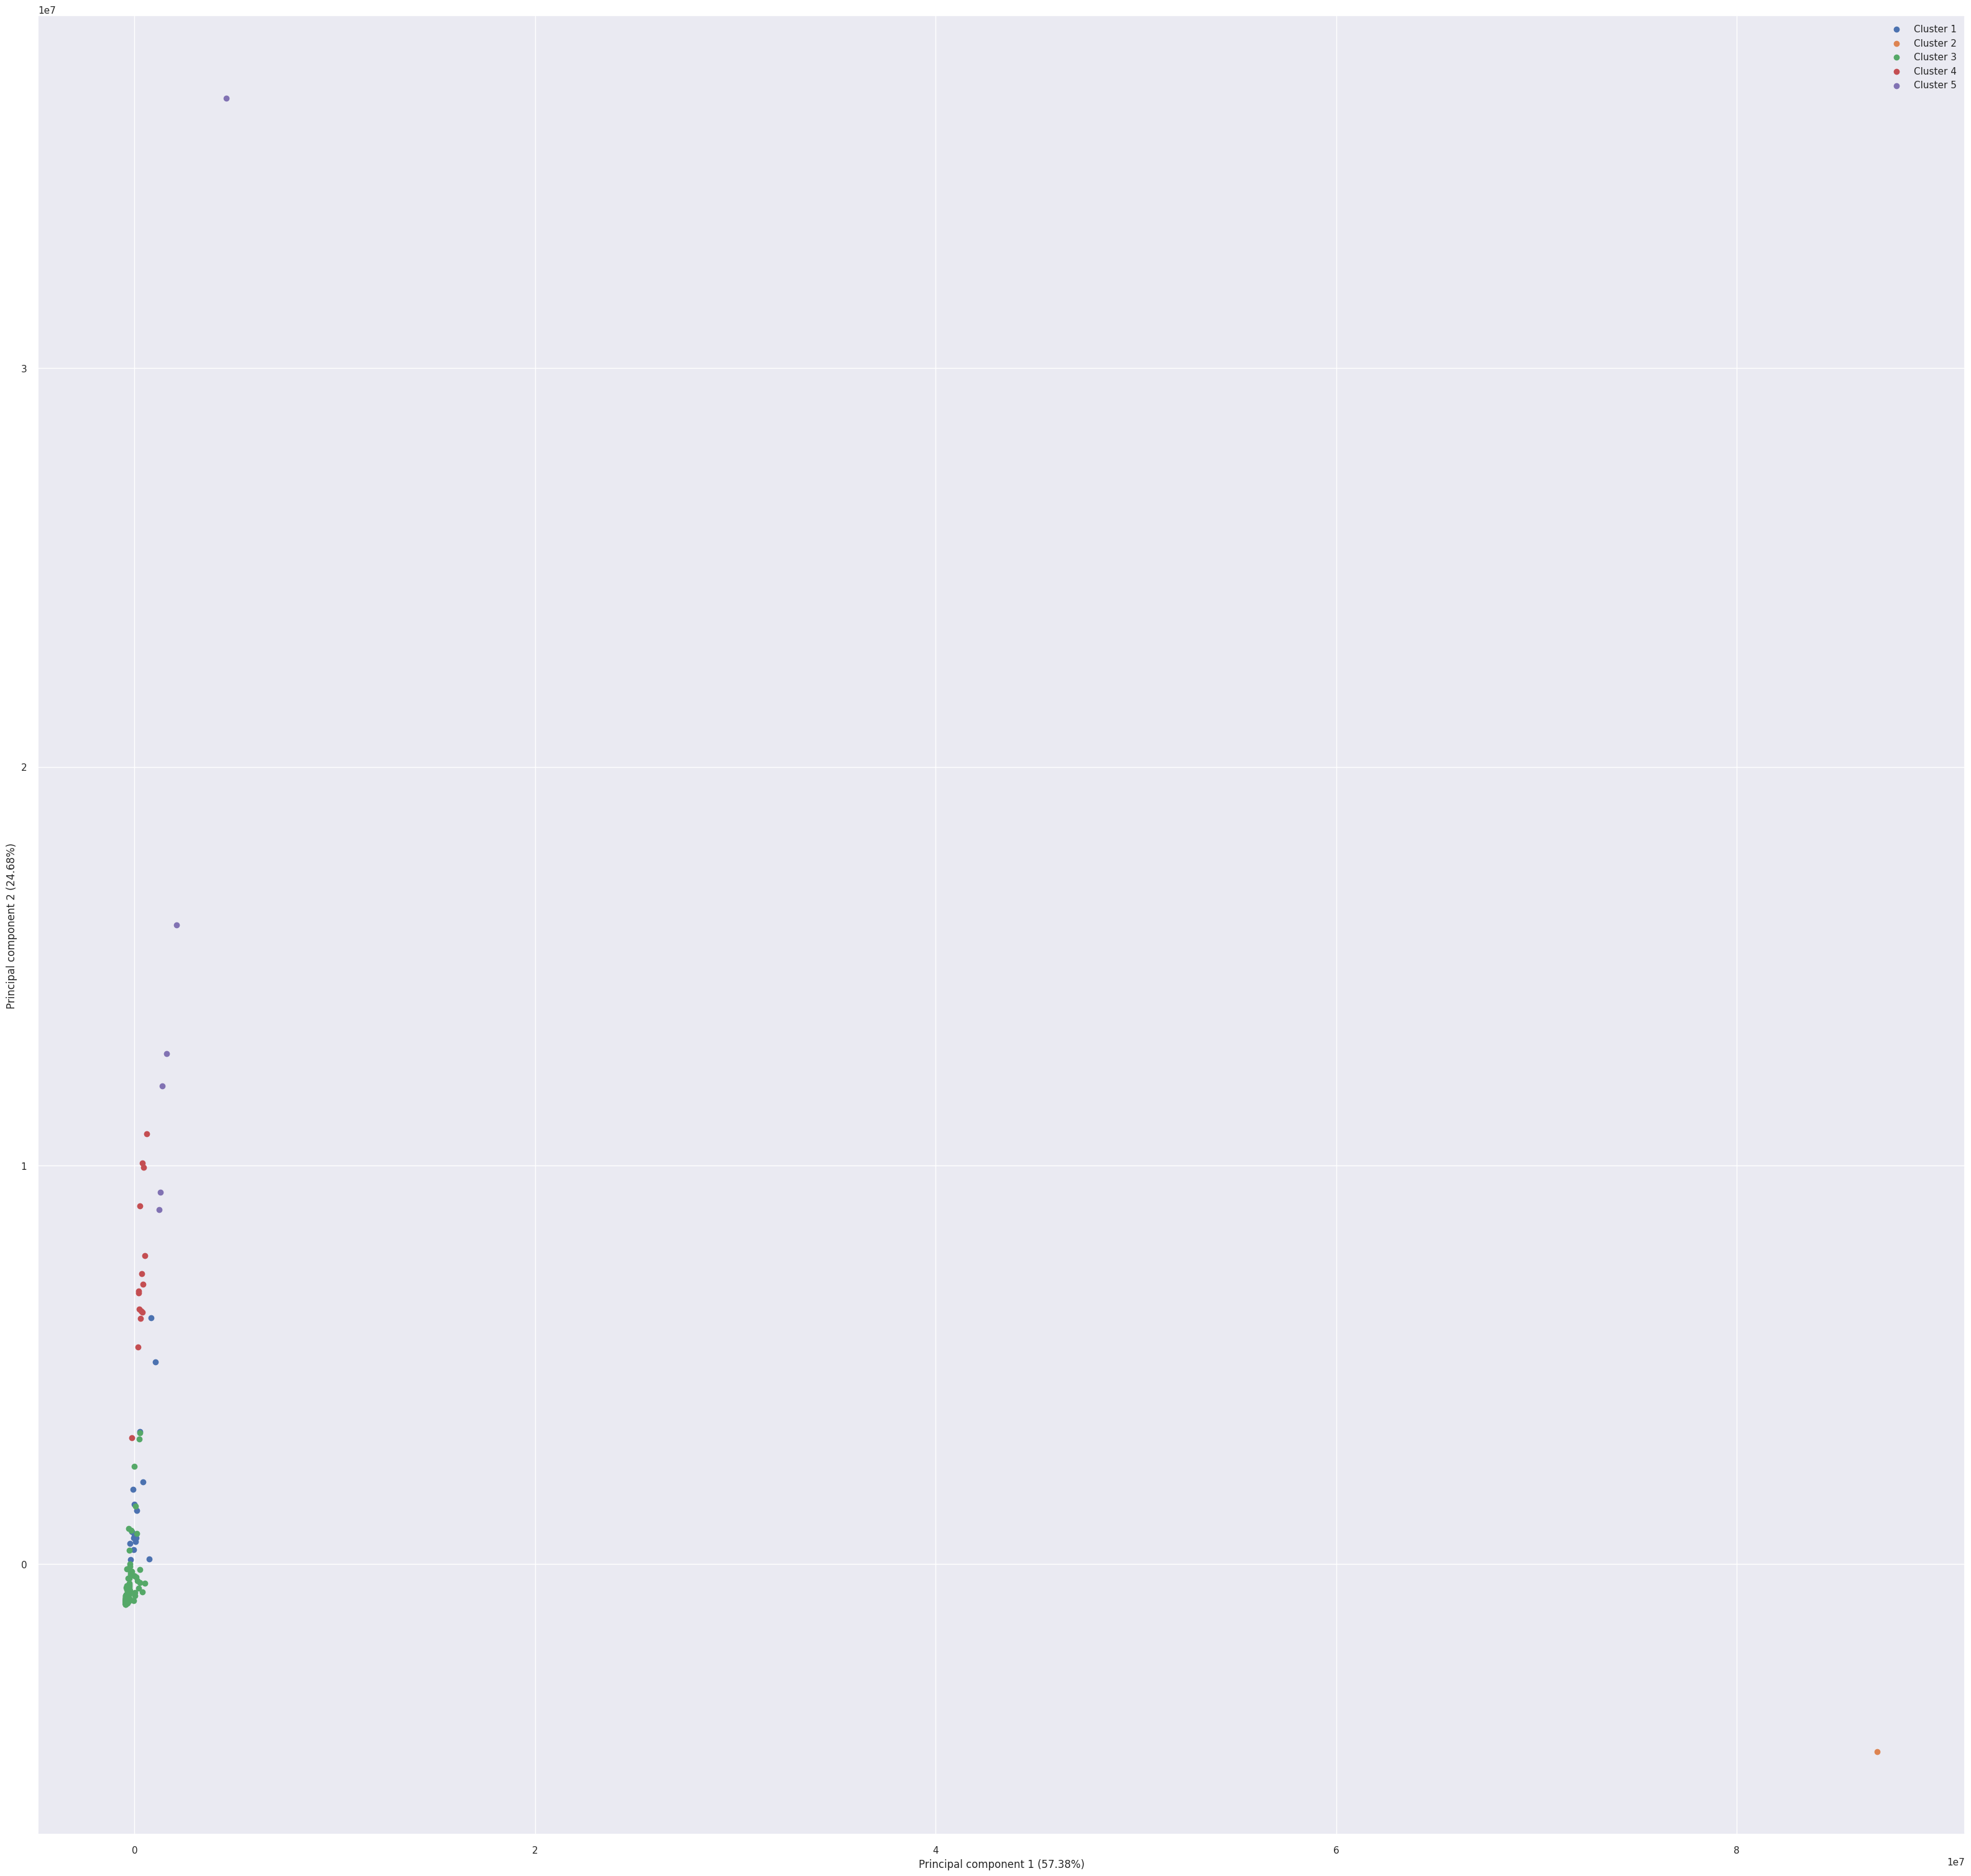

In [30]:
# Visualización de los clusters con PCA y varianzas en los ejes
fig, ax = plt.subplots()

for i in range(5):
    cluster = datos_proyectados[clusters == i]
    ax.scatter(cluster[:, 0], cluster[:, 1], label=f"Cluster {i+1}")

ax.set_xlabel(f"Principal component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
ax.set_ylabel(f"Principal component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
ax.legend()
plt.show()

### **No cambio nada entre usar ancestria o no, entonces aplicaré de nuevo con los k que da el codo**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 0 0
 0 0 5 5 5 3 0 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4
 0 0 4 4 4 4 4 4 4 2 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 4 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Centroides:  [[8.46236042e-01 1.53763958e-01 9.41568127e-02 7.55113261e-01
  1.50729936e-01 8.91259081e-02 8.68052728e-01 1.50827675e-01
  4.02551625e-02 6.89904806e-02 7.17307915e-01 1.50193311e-01
  3.09334064e-02 3.25748657e-02 6.82974276e-02 6.97824173e-01
  7.16889894e-02 3.02515972e-02 3.18905300e-02 1.00047269e-01
  6.229259

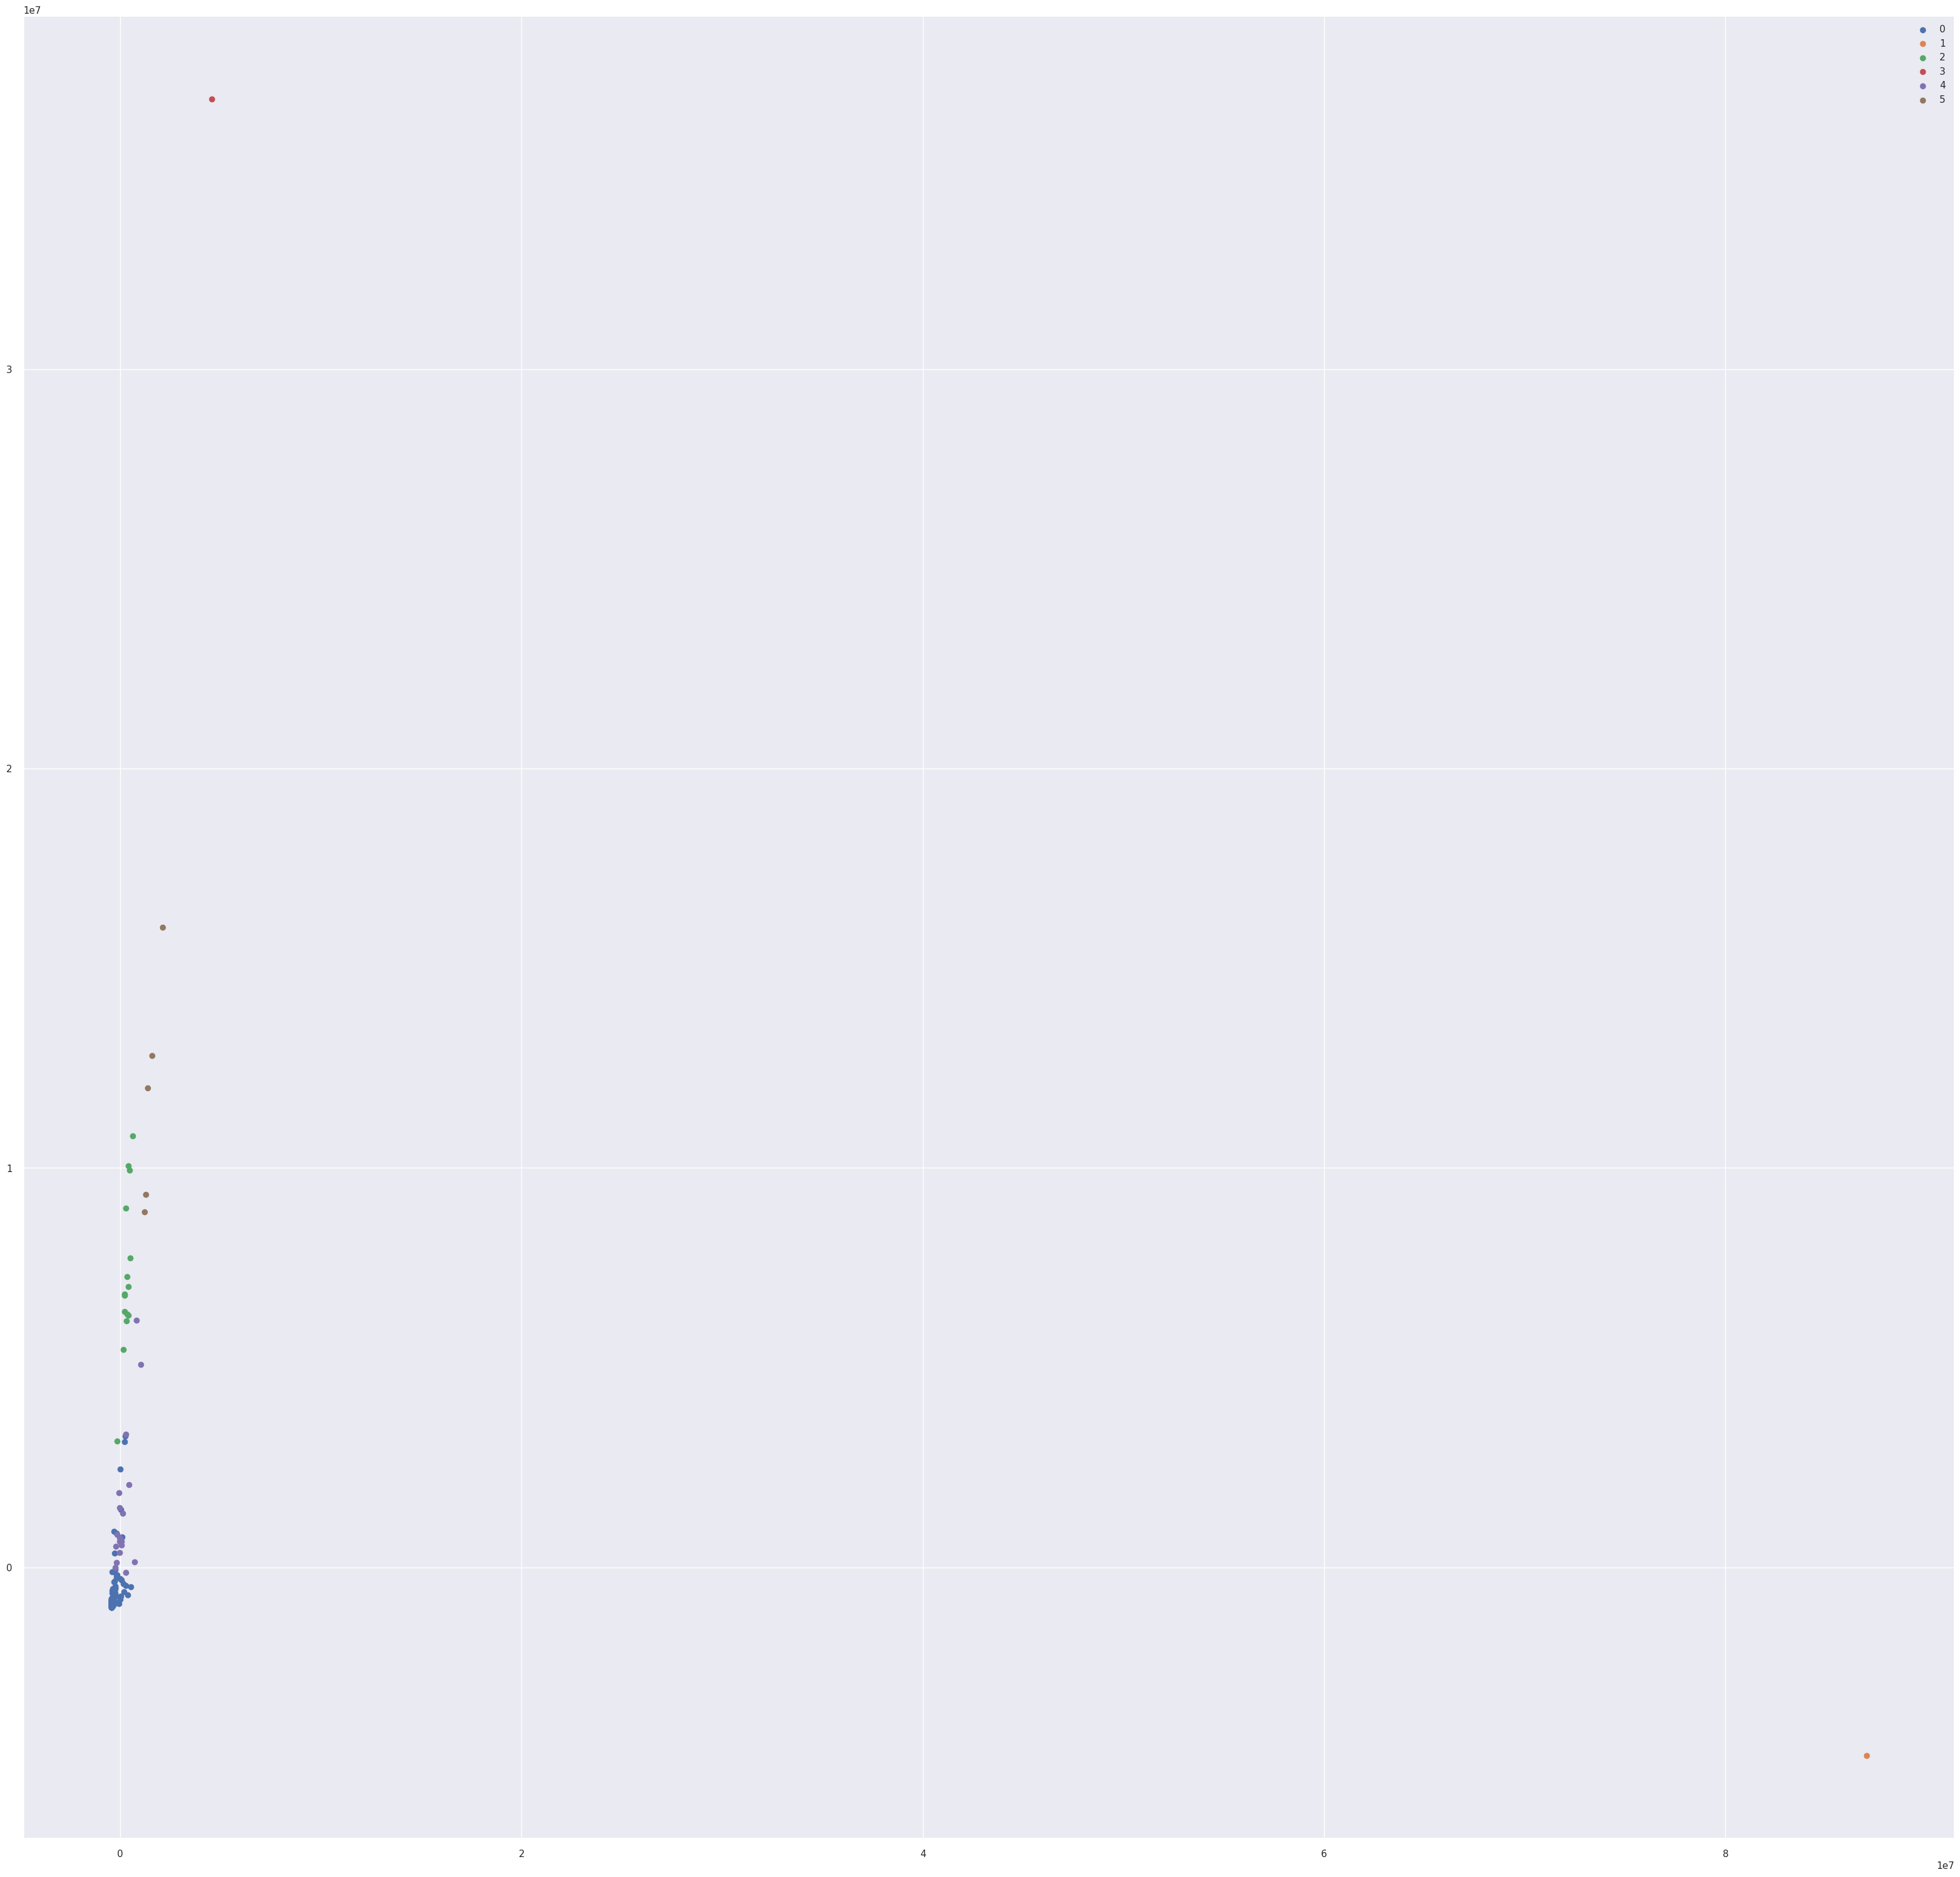

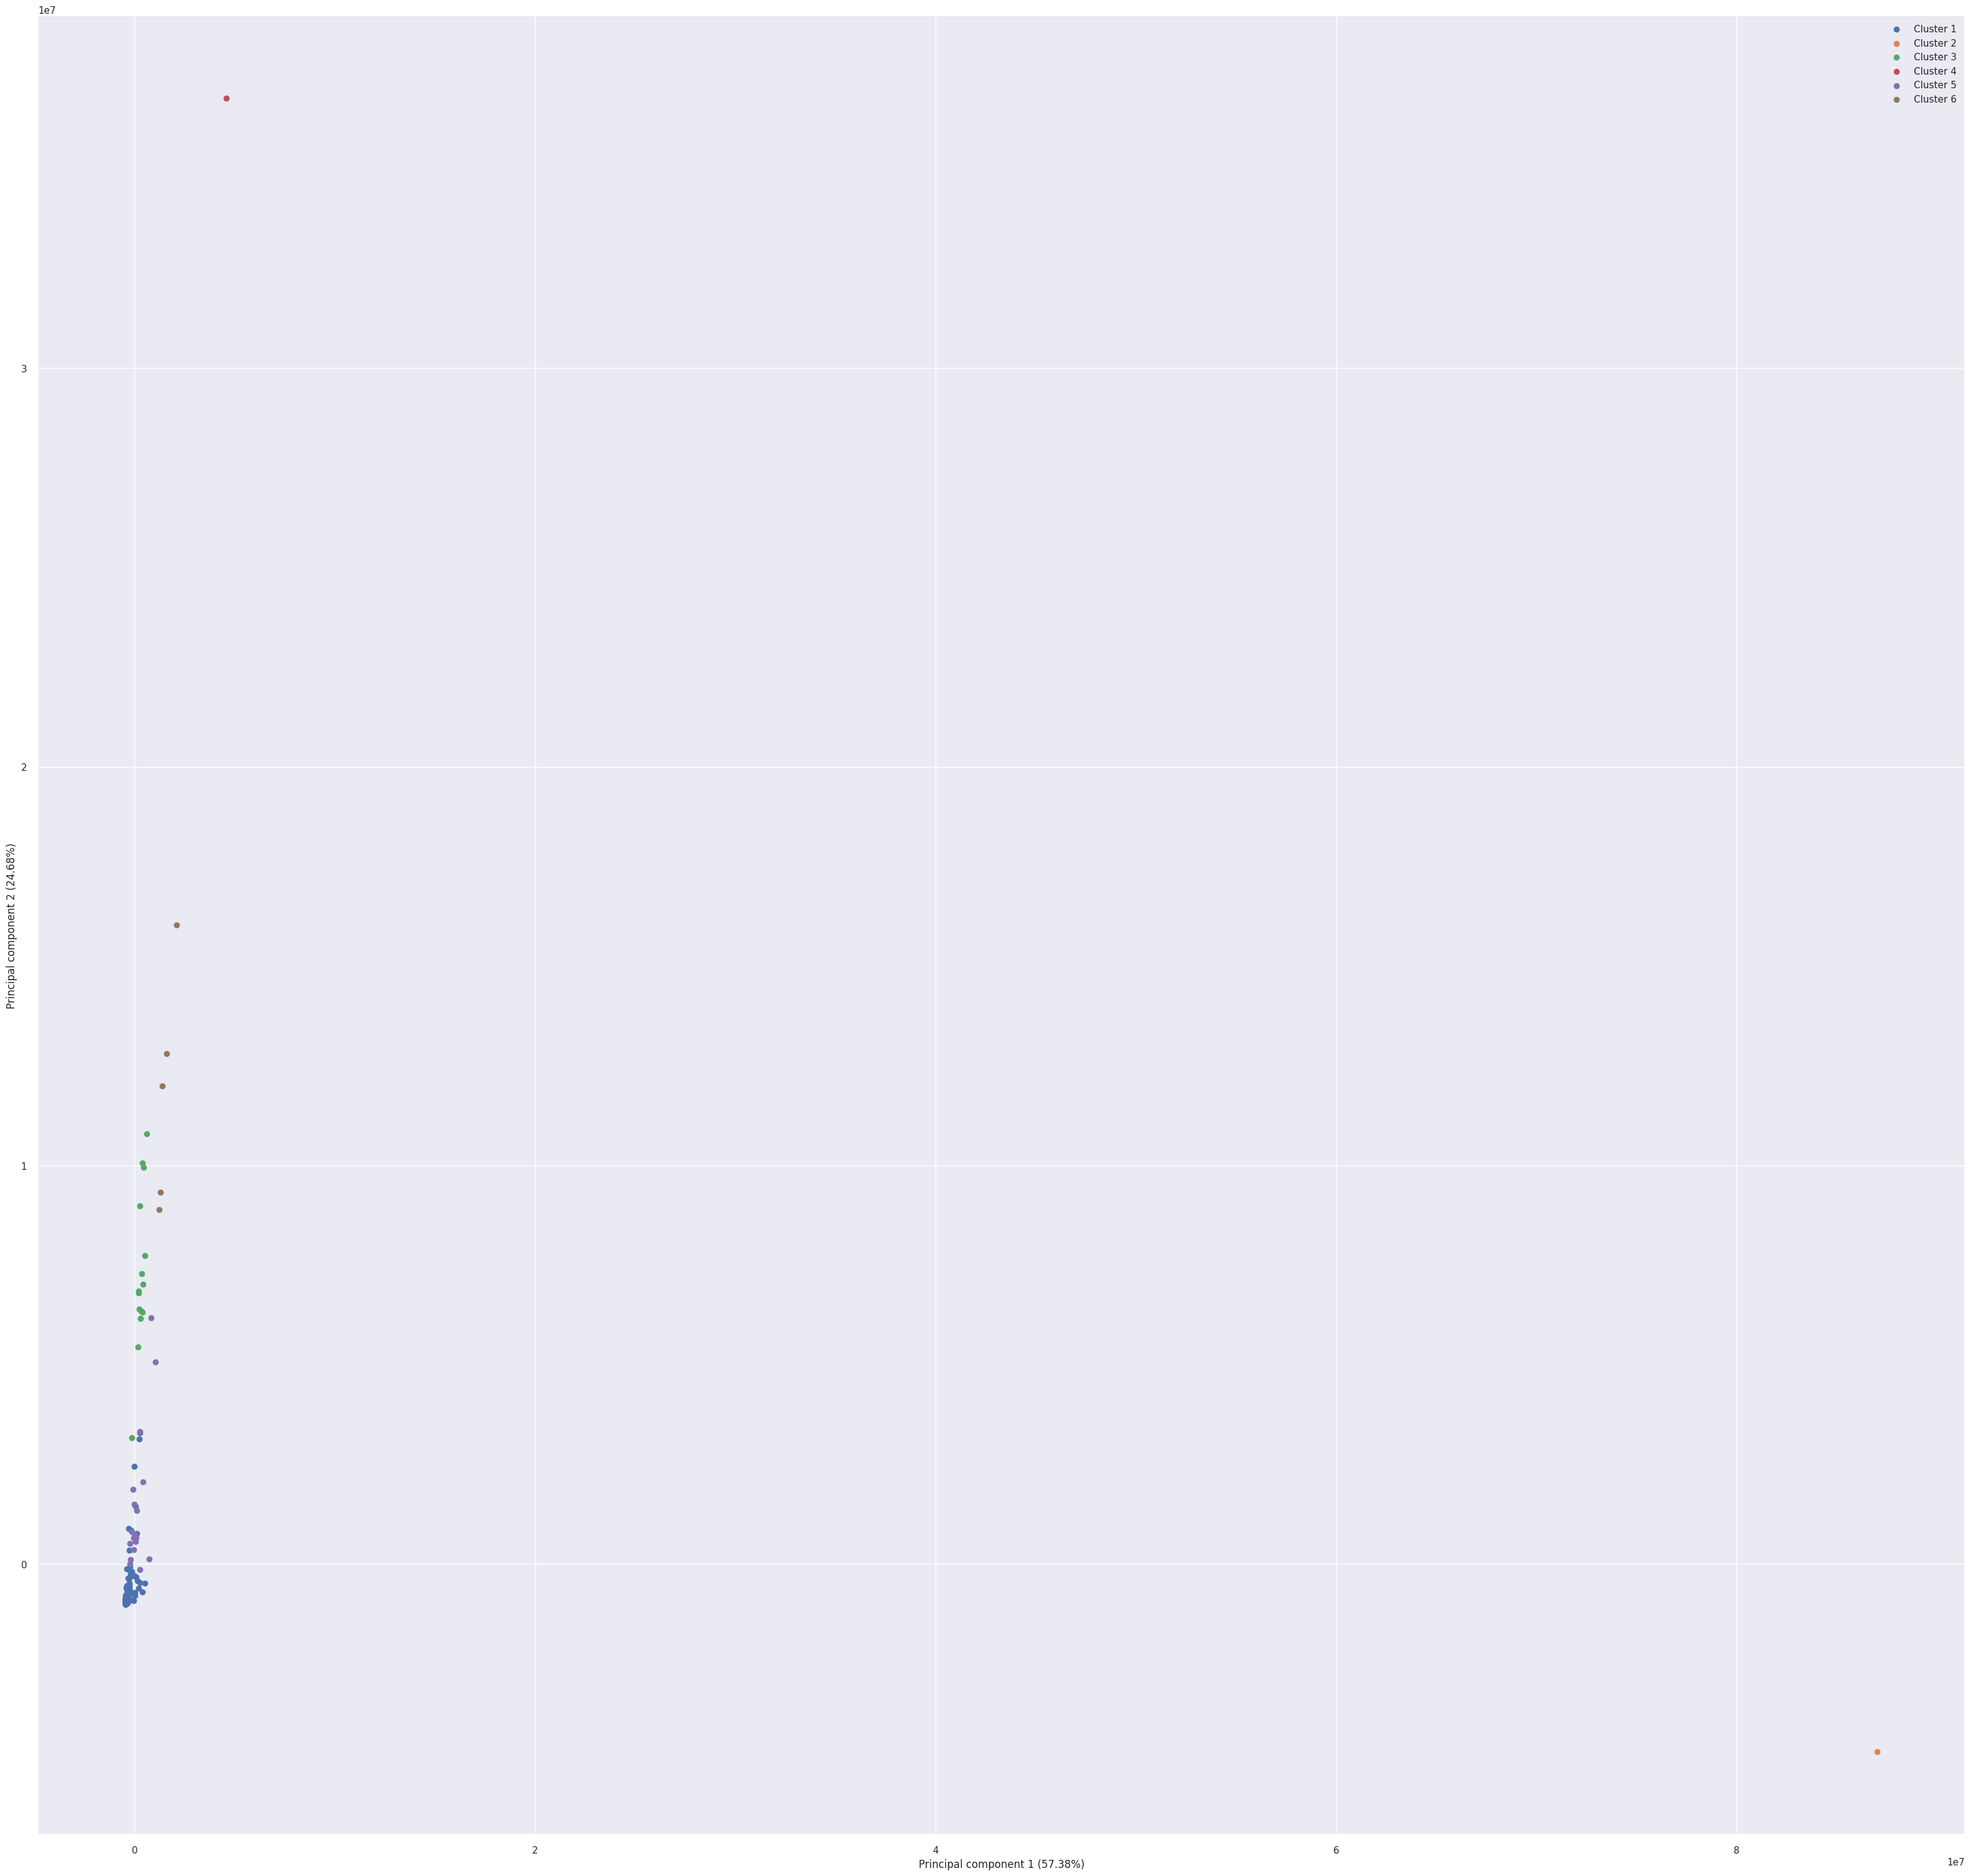

In [31]:
#Con la matriz que tiene ancestría
from sklearn.decomposition import PCA
#Ajustando a 6 k 
modelo_kmeans = KMeans(n_clusters=6)

# Ajusta el modelo a los datos
modelo_kmeans.fit(nonSupervised)

# Obtiene los clusters y los centroides
clusters = modelo_kmeans.labels_
centroides = modelo_kmeans.cluster_centers_

# Imprime los resultados
print("Clusters: ", clusters)
print("Centroides: ", centroides)

# Visualización de los clusters con PCA
pca = PCA(n_components=2)
datos_proyectados = pca.fit_transform(nonSupervised)
df = pd.DataFrame({'x': datos_proyectados[:,0], 'y': datos_proyectados[:,1], 'cluster': clusters})
grupos = df.groupby('cluster')
for name, group in grupos:
    plt.scatter(group.x, group.y, label=name)
plt.legend()
plt.show()

fig, ax = plt.subplots()

for i in range(6):
    cluster = datos_proyectados[clusters == i]
    ax.scatter(cluster[:, 0], cluster[:, 1], label=f"Cluster {i+1}")

ax.set_xlabel(f"Principal component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
ax.set_ylabel(f"Principal component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
ax.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 2 2
 2 2 0 0 0 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 0 2 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Centroides:  [[1.28904116e+04 2.17967855e+04 1.92328467e+04 4.02294950e+04
  7.60379005e+04 4.38978633e+04 8.01336210e+04 5.80345251e+05
  2.69535656e+04 7.42045954e+04 3.80866201e+05 2.50418085e+04
  8.50046768e+05 5.52225360e+05 2.56325901e+04 1.88161625e+04
  7.58051495e+04 3.83503210e+06 2.21183219e+05 1.20040457e+06
  1.903032

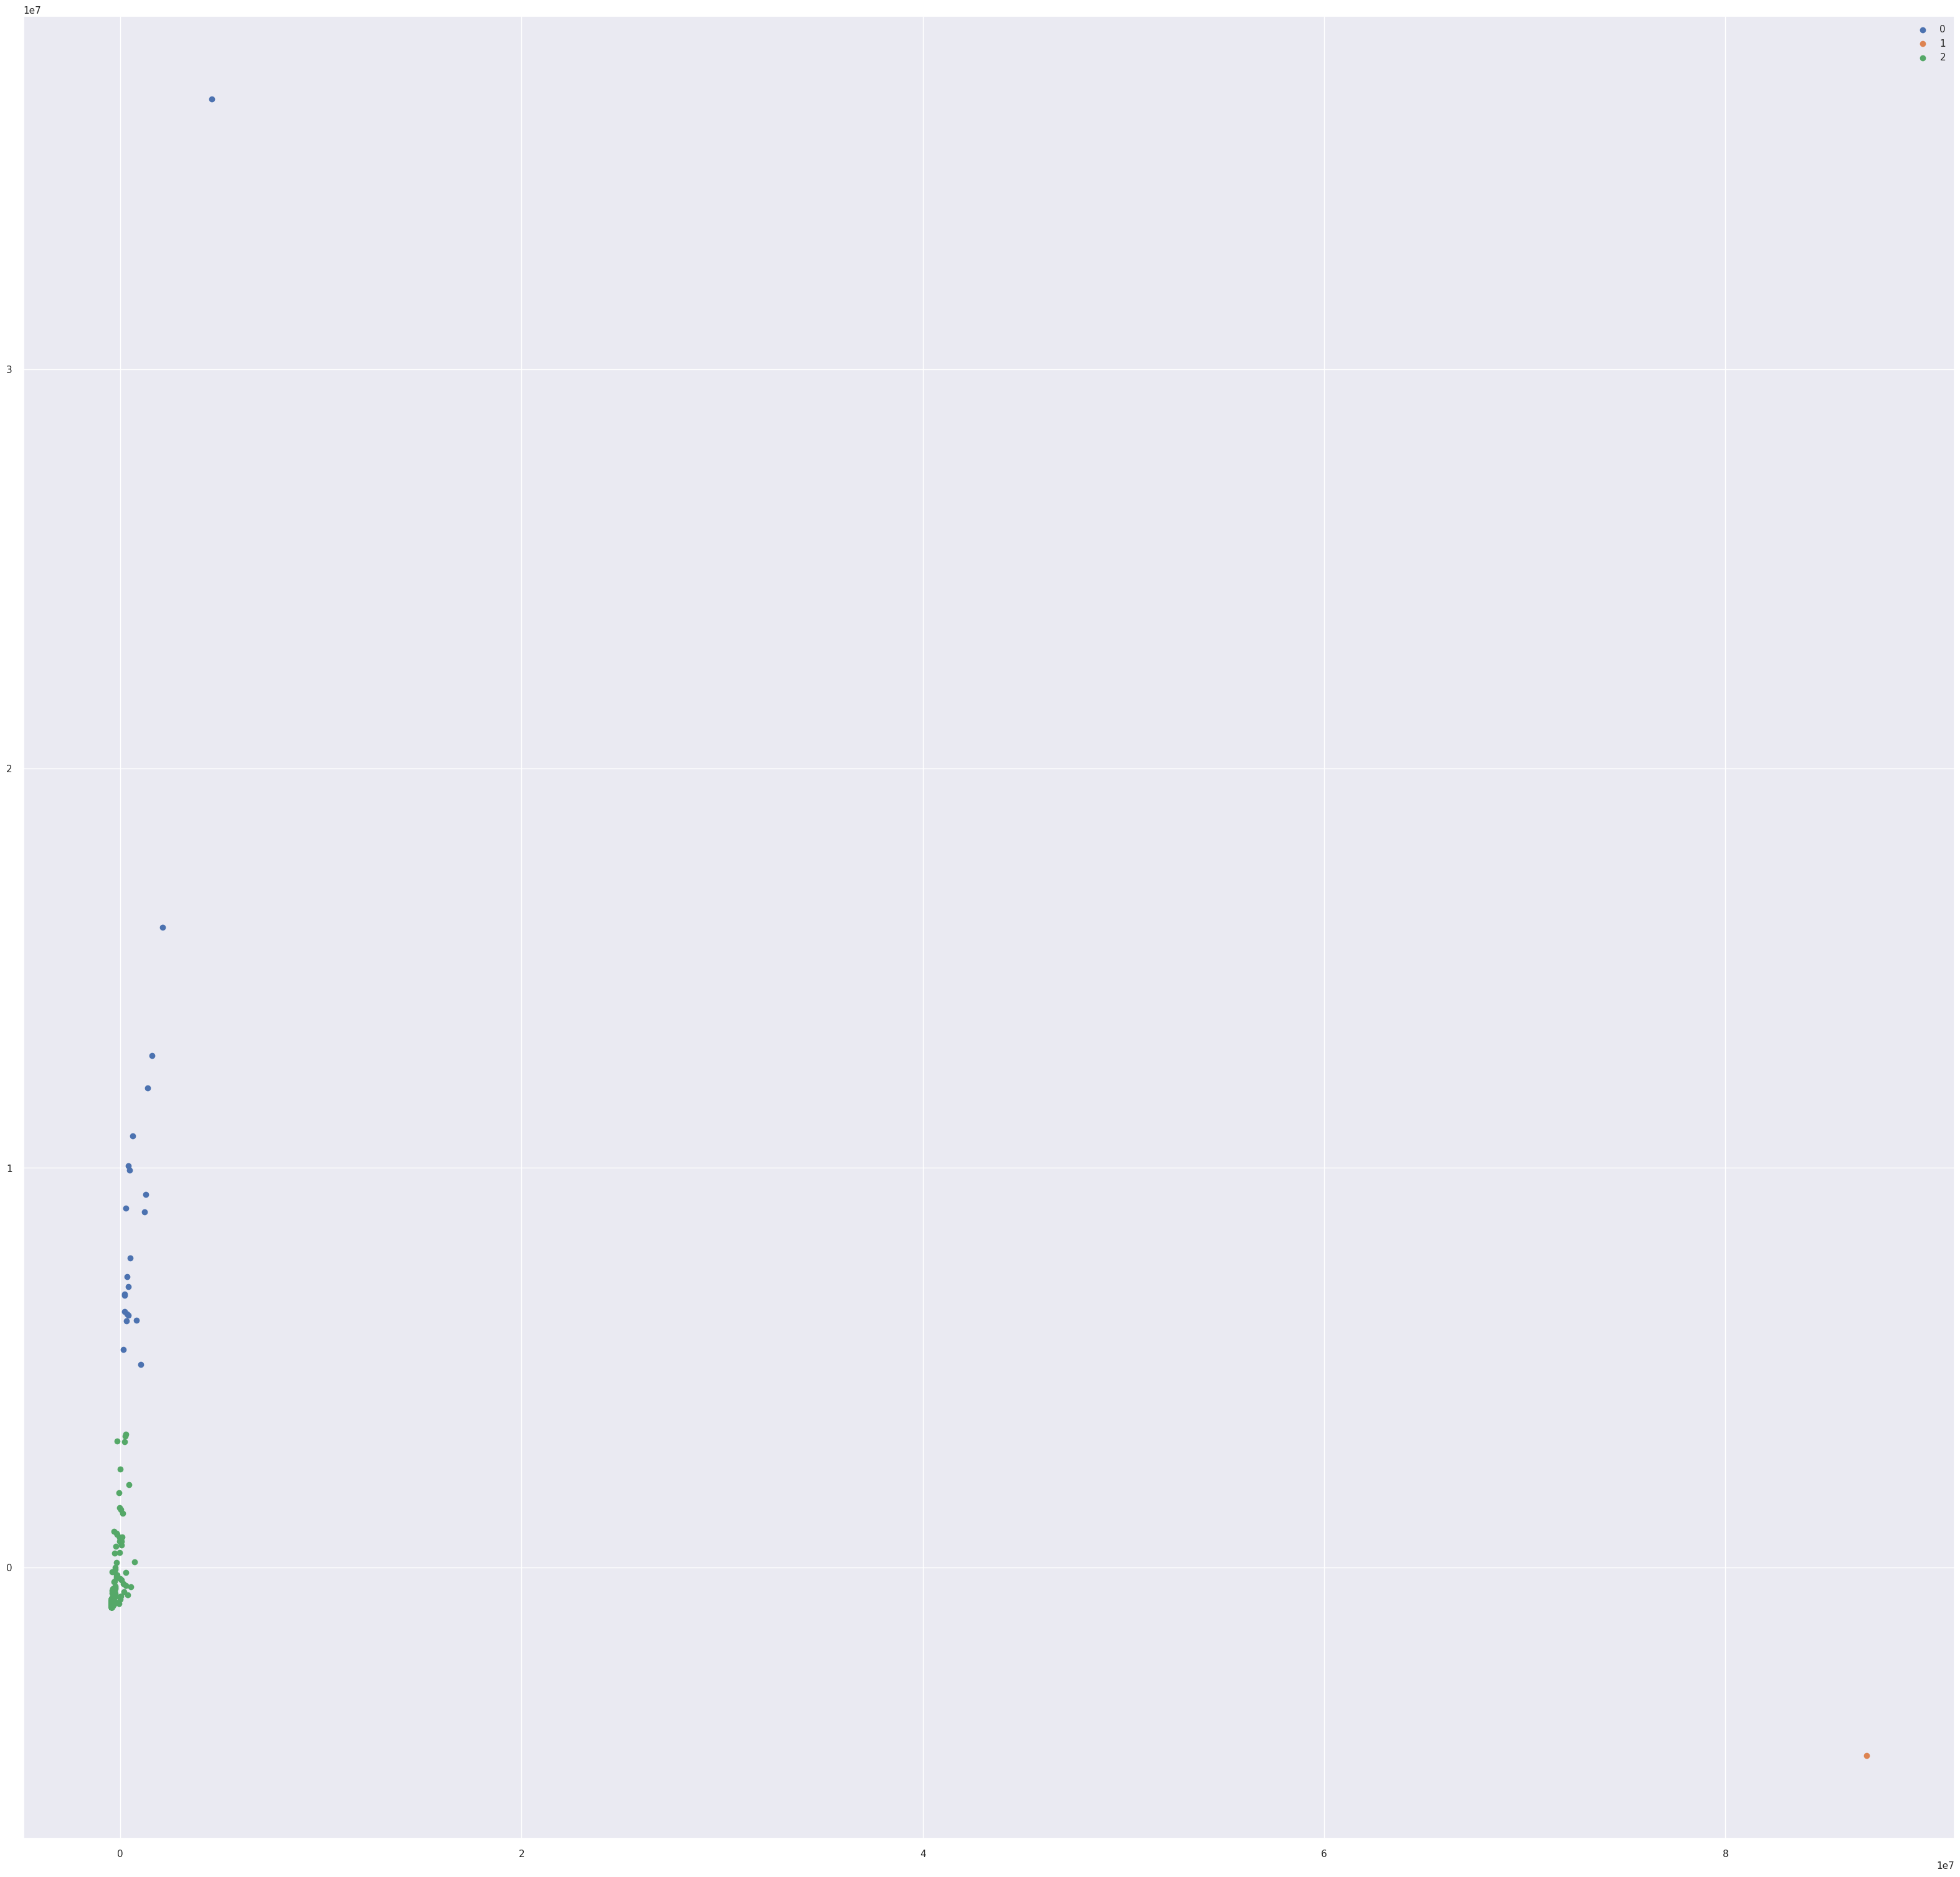

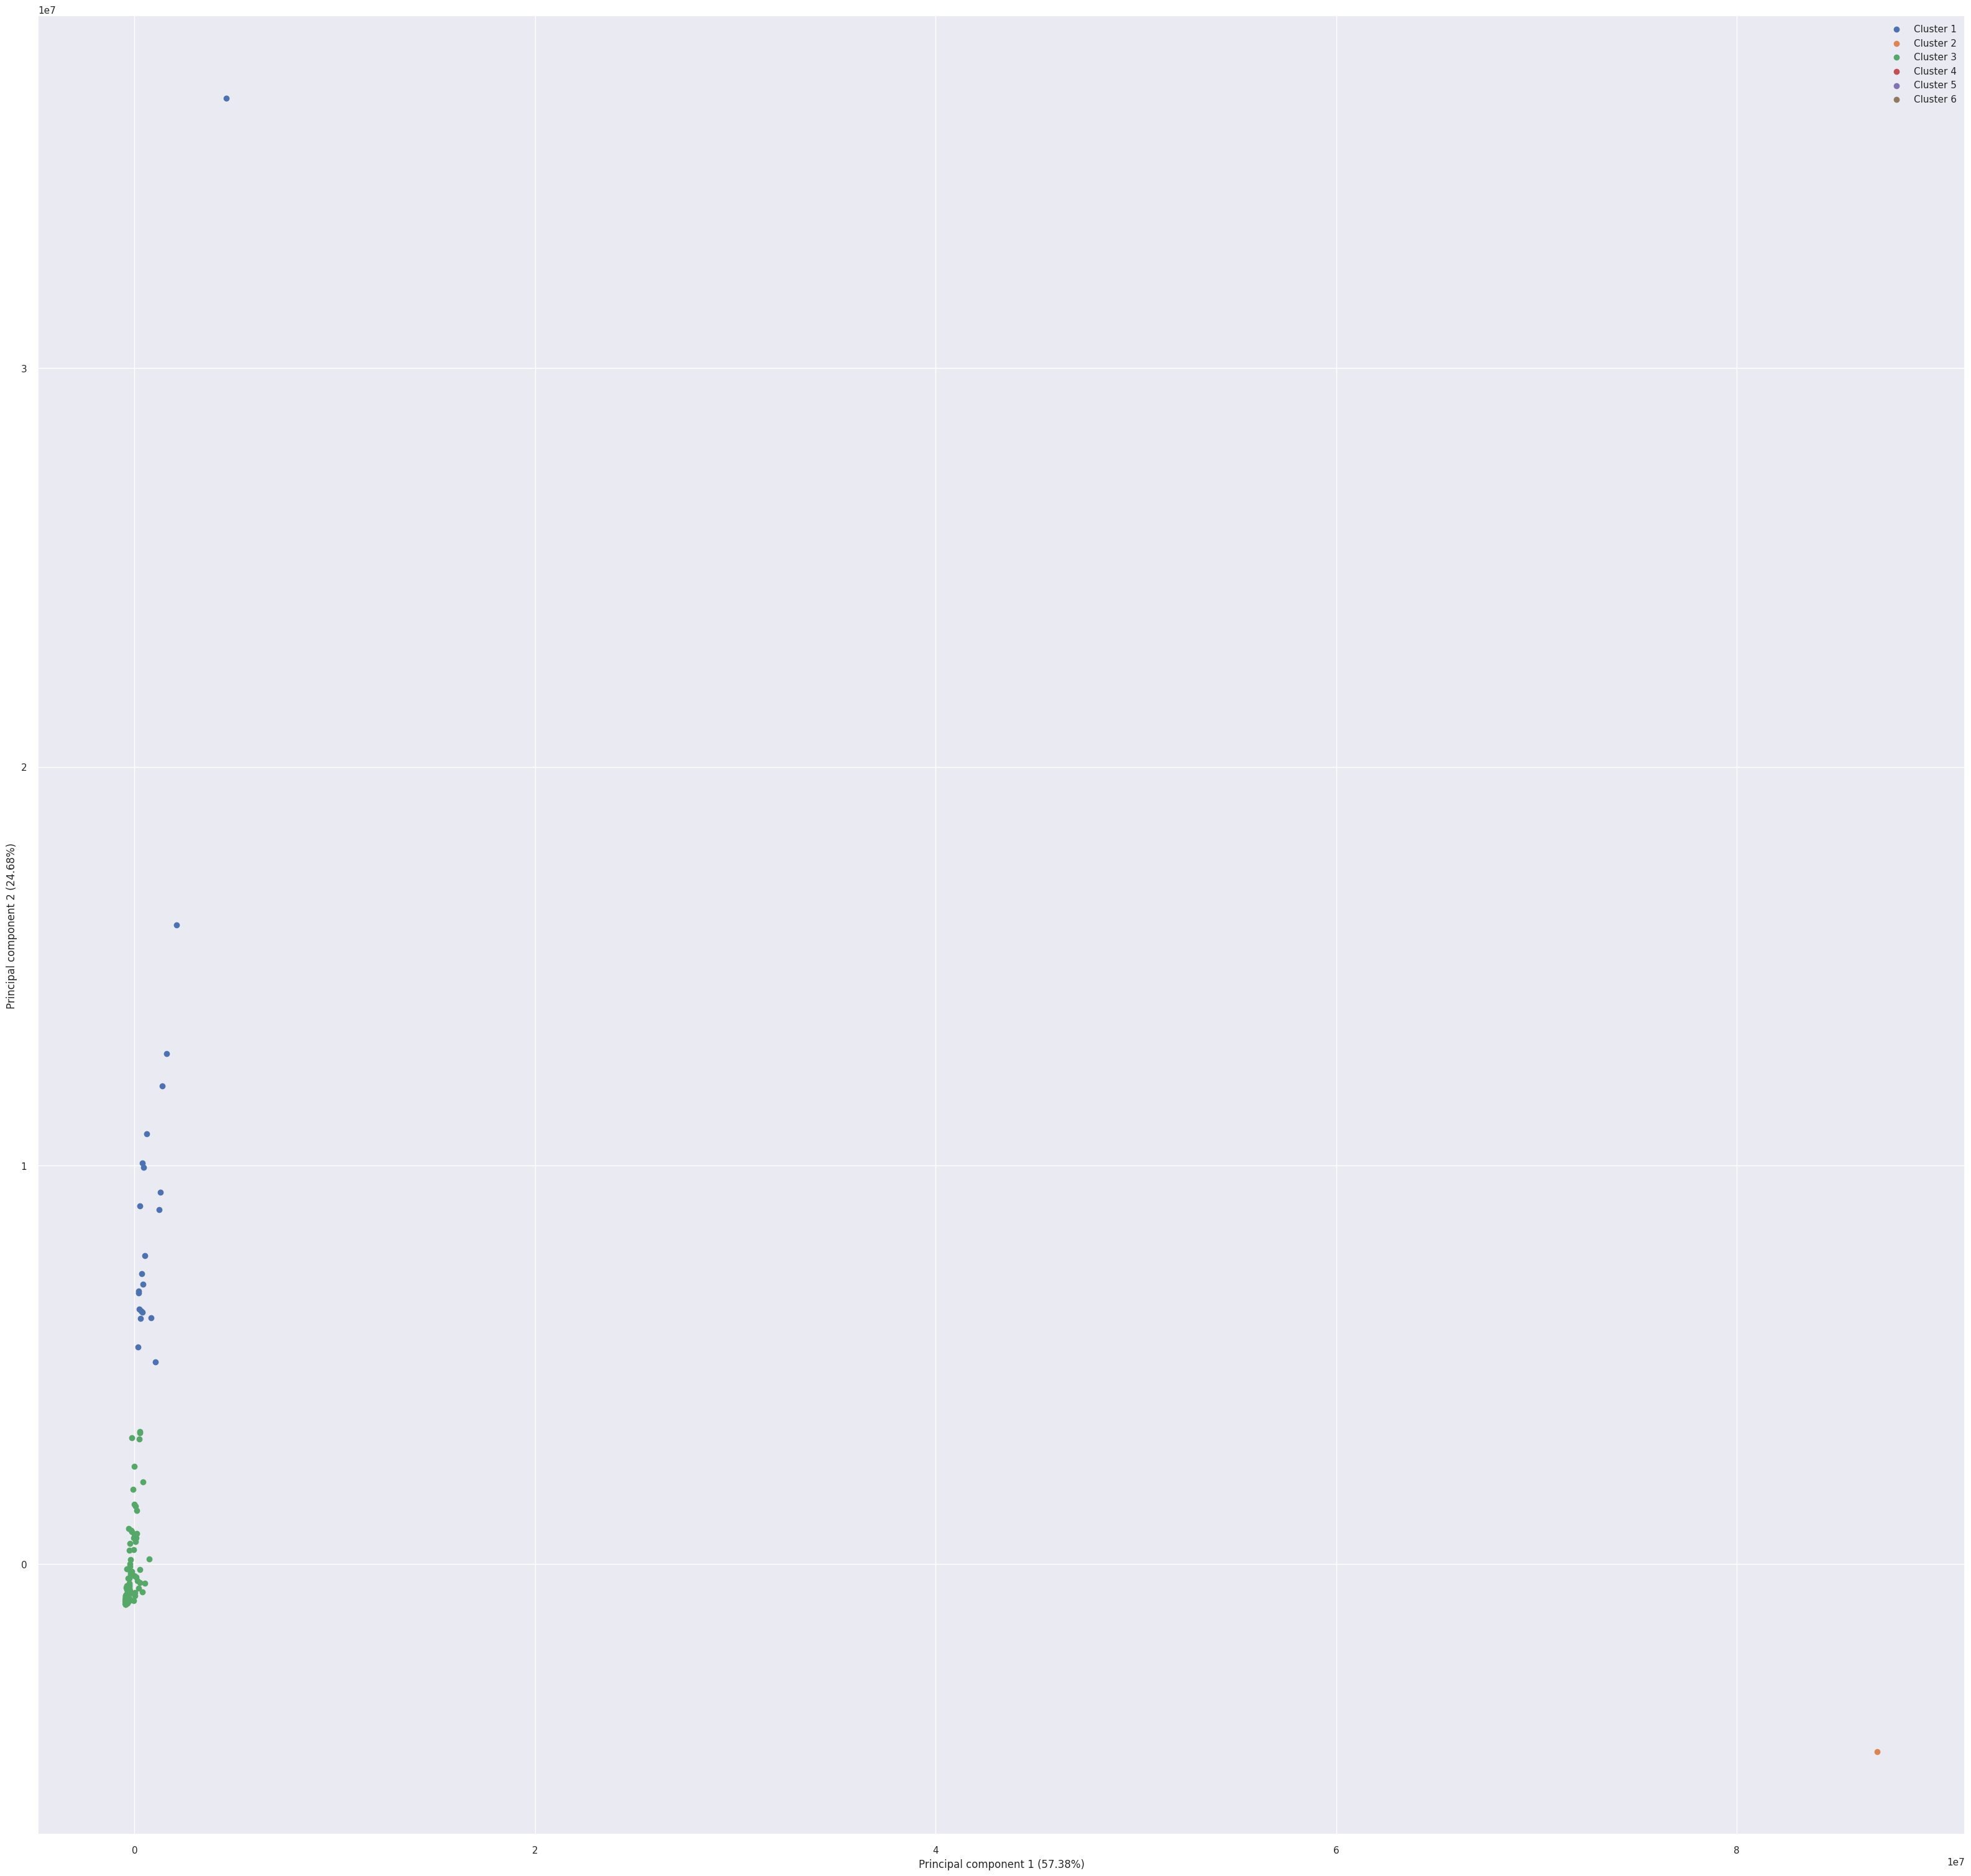

In [32]:
#Con la matriz que NO tiene ancestría
from sklearn.decomposition import PCA
#Ajustando a 3 k 
modelo_kmeans = KMeans(n_clusters=3)

# Ajusta el modelo a los datos
modelo_kmeans.fit(JustGeneExpression)

# Obtiene los clusters y los centroides
clusters = modelo_kmeans.labels_
centroides = modelo_kmeans.cluster_centers_

# Imprime los resultados
print("Clusters: ", clusters)
print("Centroides: ", centroides)

# Visualización de los clusters con PCA
pca = PCA(n_components=2)
datos_proyectados = pca.fit_transform(nonSupervised)
df = pd.DataFrame({'x': datos_proyectados[:,0], 'y': datos_proyectados[:,1], 'cluster': clusters})
grupos = df.groupby('cluster')
for name, group in grupos:
    plt.scatter(group.x, group.y, label=name)
plt.legend()
plt.show()

fig, ax = plt.subplots()

for i in range(6):
    cluster = datos_proyectados[clusters == i]
    ax.scatter(cluster[:, 0], cluster[:, 1], label=f"Cluster {i+1}")

ax.set_xlabel(f"Principal component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
ax.set_ylabel(f"Principal component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
ax.legend()
plt.show()

## **Quitar las muestras que desvian la varianza**

In [33]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/tesisJohannaStepanian/ML/step2_mergedCounts_ancestry_subtypes

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-5fe036bda534>", line 1, in <cell line: 1>
    get_ipython().run_line_magic('cd', '/content/drive/MyDrive/tesisJohannaStepanian/ML/step2_mergedCounts_ancestry_subtypes')
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/us

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

breast_cancer = pd.read_csv('mostVariantGenes_ancestry_normalizedcounts_withoutSRR10804465_SRR7012369.csv')
breast_cancer.head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-c3f92530fd88>", line 5, in <cell line: 5>
    breast_cancer = pd.read_csv('mostVariantGenes_ancestry_normalizedcounts_withoutSRR10804465_SRR7012369.csv')
  File "/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/reade

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-c3f92530fd88>", line 5, in <cell line: 5>
    breast_cancer = pd.read_csv('mostVariantGenes_ancestry_normalizedcounts_withoutSRR10804465_SRR7012369.csv')
  File "/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/reade

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-c3f92530fd88>", line 5, in <cell line: 5>
    breast_cancer = pd.read_csv('mostVariantGenes_ancestry_normalizedcounts_withoutSRR10804465_SRR7012369.csv')
  File "/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/reade

In [34]:
breast_cancer['subtype'].value_counts()

Basal     115
LumB       61
LumA       56
Normal     46
Her2       45
Name: subtype, dtype: int64

In [35]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gene-ACTG1|ACTG1                  323 non-null    float64
 1   gene-LOC105378179|LOC105378179    323 non-null    float64
 2   06S10197329_S4_L001.39175|CYTB    323 non-null    float64
 3   gene-COL1A2|COL1A2                323 non-null    float64
 4   gene-NEAT1|NEAT1                  323 non-null    float64
 5   gene-AHNAK|AHNAK                  323 non-null    float64
 6   gene-TALAM1|TALAM1                323 non-null    float64
 7   gene-RN7SL1|RN7SL1                323 non-null    float64
 8   gene-IST|IST                      323 non-null    float64
 9   gene-SLCO5A1|SLCO5A1              323 non-null    float64
 10  gene-RN7SK|RN7SK                  323 non-null    float64
 11  gene-ACTB|ACTB                    323 non-null    float64
 12  gene-RNA

In [ ]:
#Eliminar valores nulos y sample column y todos los valores de probabilidad para los subtipos 
breast_cancer.dropna(axis=0, inplace=True)
breast_cancer= breast_cancer.drop('sample',axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.Basal', axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.Her2', axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.LumB', axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.LumA', axis=1)
breast_cancer= breast_cancer.drop('subtype.proba.Normal', axis=1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-a26856e07e93>", line 3, in <cell line: 3>
    breast_cancer= breast_cancer.drop('sample',axis=1)
  File "/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py", line 5399, in drop
    return super().drop(
  File "/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py", line 4505, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py", line 4546, in _drop_axis
    new_axis = axis.drop(labels, errors=errors)
  File

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-a26856e07e93>", line 3, in <cell line: 3>
    breast_cancer= breast_cancer.drop('sample',axis=1)
  File "/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py", line 5399, in drop
    return super().drop(
  File "/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py", line 4505, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py", line 4546, in _drop_axis
    new_axis = axis.drop(labels, errors=errors)
  File

In [36]:
#Eliminar labels de subtypo 
nonSupervised = breast_cancer.drop('subtype', axis=1)
nonSupervised.head()

gene-ACTG1|ACTG1  gene-LOC105378179|LOC105378179  \
0       72567.18596                           0.000   
1       75016.80000                           0.000   
2       91339.72000                         595.142   
3       92308.84195                           0.000   
4       92111.15505                           0.000   

   06S10197329_S4_L001.39175|CYTB  gene-COL1A2|COL1A2  gene-NEAT1|NEAT1  \
0                       114.20387        159357.01537          67.32915   
1                       134.86890        165655.90000          84.51786   
2                       136.32790         65774.94000          96.83985   
3                        92.89719         65806.04755          83.22040   
4                       152.12412         64541.86562          69.64719   

   gene-AHNAK|AHNAK  gene-TALAM1|TALAM1  gene-RN7SL1|RN7SL1  gene-IST|IST  \
0       74045.01816             0.00000           581.24657   43752.01487   
1       76579.48000             0.00000           641.07700   47280.55000   
2       71704.74000             0.00000           402.40250   21282.20000   
3       72018.54719             0.00000           458.67988   20833.16272   
4       71427.77310          3114.87883           414.21749   20599.98860   

   gene-SLCO5A1|SLCO5A1  ...  gene-LOC112268284|LOC112268284  \
0             205.39652  ...                        0.000000   
1             215.79030  ...                        0.899126   
2             272.65590  ...                        0.000000   
3             268.04710  ...                        0.000000   
4             286.83644  ...                        0.000000   

   gene-RNA45SN1|RNA45SN1  gene-FTH1|FTH1  gene-HSP90AA1|HSP90AA1  \
0              6261.61082     59290.55966             28868.86395   
1              6929.56600     59863.82000             29804.24000   
2              5168.23900     48685.06000            148613.40000   
3              4860.65197     48301.70084            148214.56493   
4              4714.93133     48008.90622            146690.72358   

   gene-LALBA|LALBA  gene-CSN2|CSN2  gene-LOC107987206|LOC107987206  \
0               0.0             0.0                             0.0   
1               0.0             0.0                             0.0   
2               0.0             0.0                             0.0   
3               0.0             0.0                             0.0   
4               0.0             0.0                             0.0   

   gene-LOC112268313|LOC112268313  gene-ALB|ALB  06S10197329_S4_L001.39174|ND6  
0                       443.17921      13.63628                       33.23844  
1                       441.47100      10.78951                       25.17553  
2                       257.61280       0.00000                       39.48809  
3                       275.78854      11.61215                       50.31931  
4                       252.92926      11.91333                       43.98770  

[5 rows x 57 columns]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

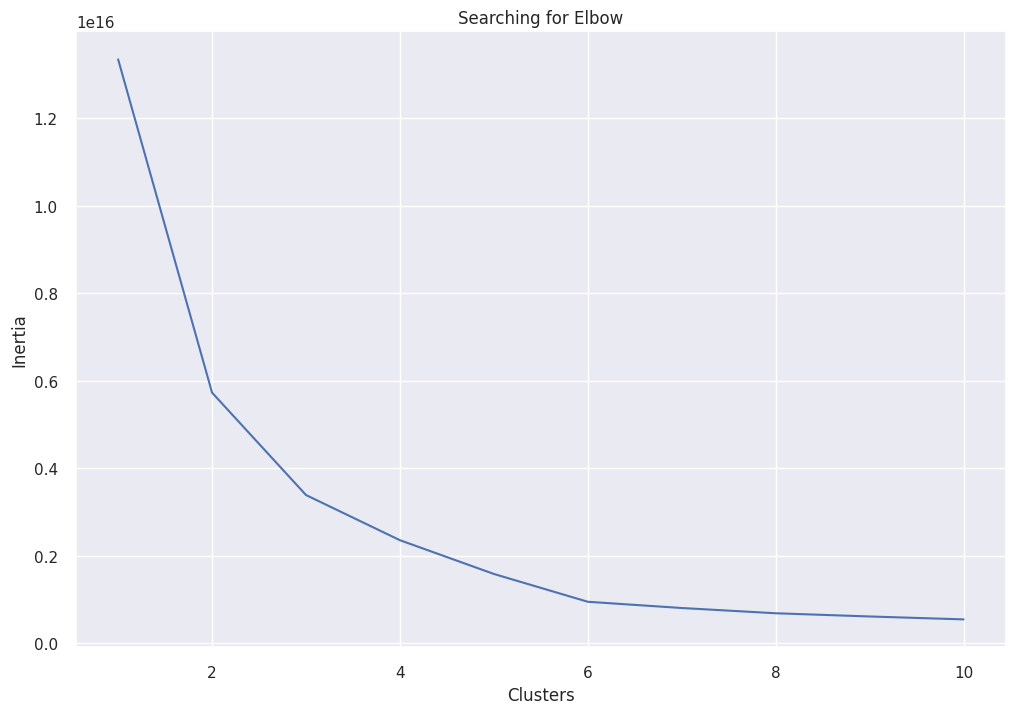

In [37]:
#este es el codo que me había pasado JP
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(nonSupervised)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

In [ ]:
#primero volveré a hacer el codo 
!pip install yellowbrick 

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#Instantiate the clustering model and visualizer 
km = KMeans(random_state=33)
visualizer = KElbowVisualizer(km, k=(2,14))
visualizer.fit(nonSupervised)
visualizer.show() 

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-5c419246b89f>", line 9, in <cell line: 9>
    sns.clustermap(corr_matrix)
  File "/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py", line 1258, in clustermap
    return plotter.plot(metric=metric, method=method,
  File "/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py", line 1129, in plot
    self.plot_dendrograms(row_cluster, col_cluster, metric, method,
  File "/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py", line 974, in plot_dendrograms
    self.dendrogram_row = dendrogram(
  File "/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py", line 687, in dendrogram
    plotter = _DendrogramPlotter(data, linkage=linkage, axis=axis,
  File "/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py", line 495, in __init__
    self.linkage = self.

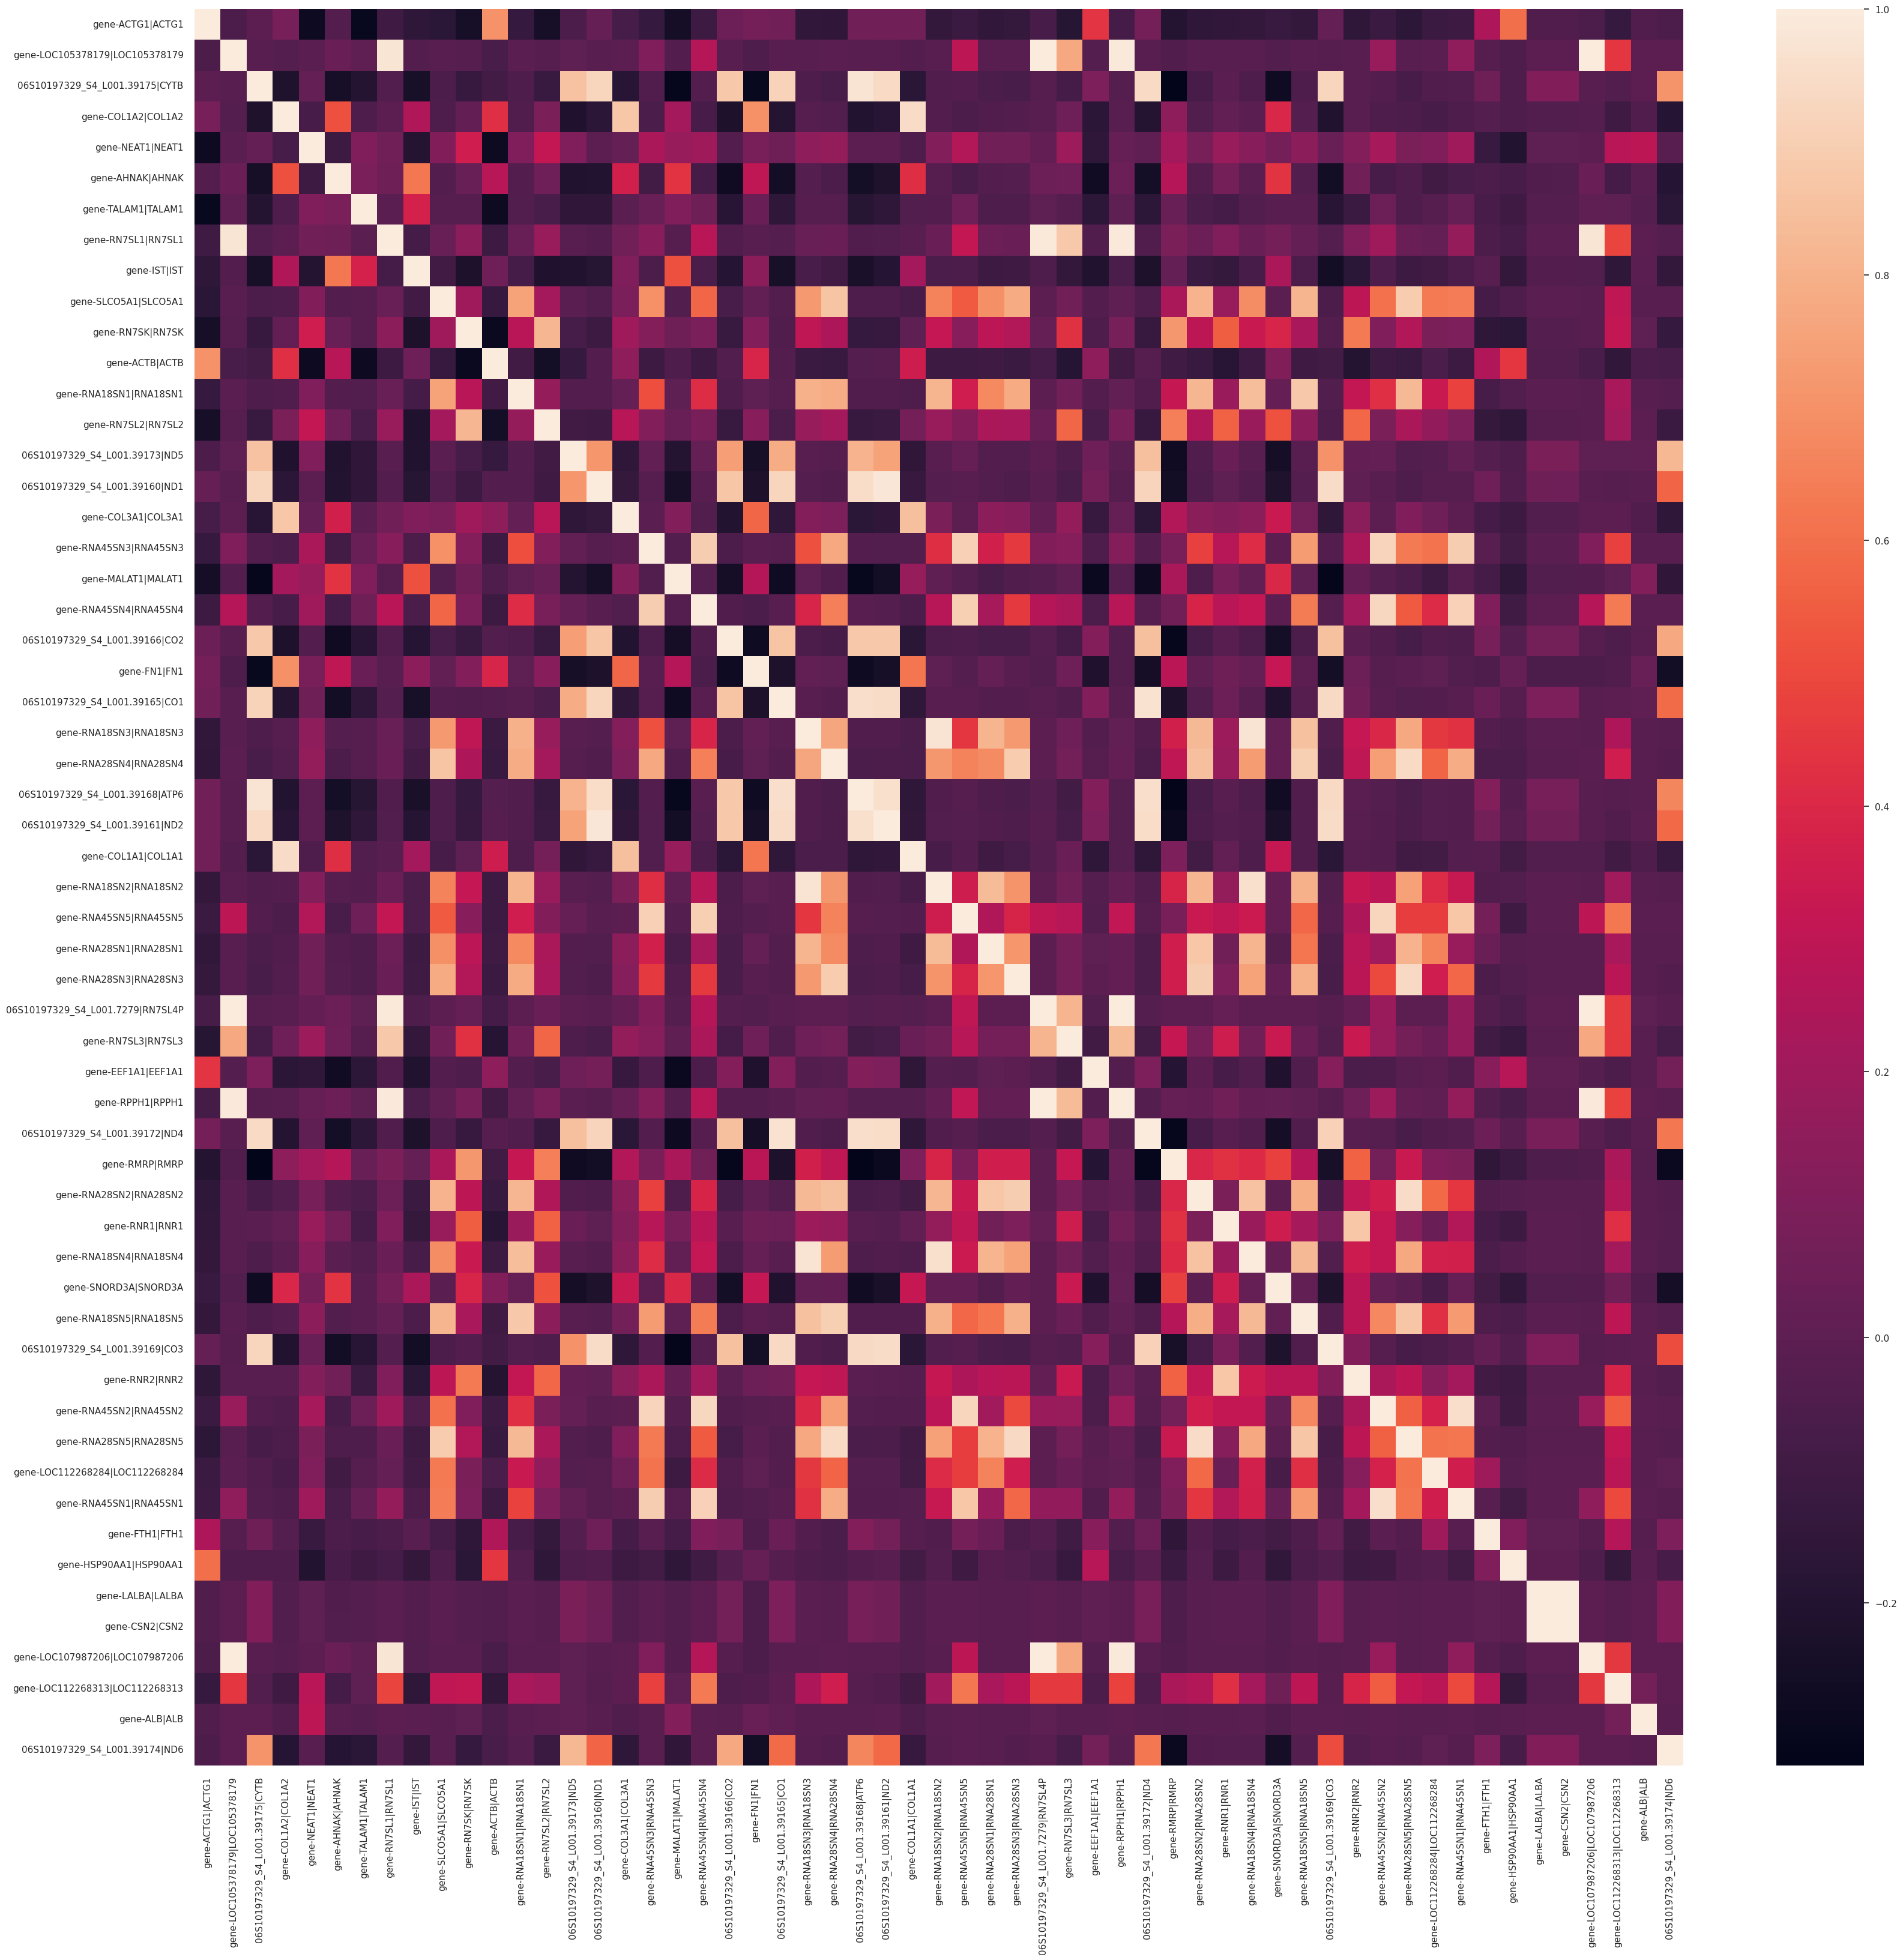

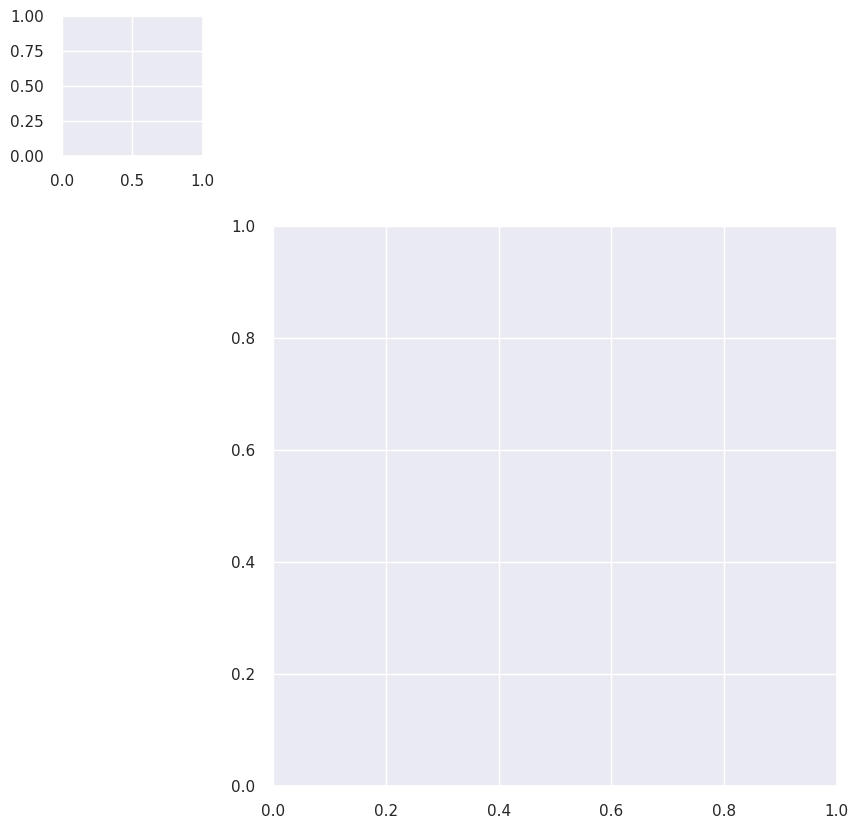

In [ ]:
#Pero solo toma en cuenta las primeras columnas, entonces hagamos correlación para ver las 3 mas correlacionadas y repetir el grafico 
corr_matrix = nonSupervised.corr()
sns.set(rc={'figure.figsize':(40,38)})
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

sns.set(rc={'figure.figsize':(40,38)})
sns.clustermap(corr_matrix)


In [ ]:
from sklearn.decomposition import PCA
#Ajustando a 5 k 
modelo_kmeans = KMeans(n_clusters=4)

# Ajusta el modelo a los datos
modelo_kmeans.fit(nonSupervised)

# Obtiene los clusters y los centroides
clusters = modelo_kmeans.labels_
centroides = modelo_kmeans.cluster_centers_

# Imprime los resultados
print("Clusters: ", clusters)
print("Centroides: ", centroides)

# Visualización de los clusters con PCA
pca = PCA(n_components=2)
datos_proyectados = pca.fit_transform(nonSupervised)
df = pd.DataFrame({'x': datos_proyectados[:,0], 'y': datos_proyectados[:,1], 'cluster': clusters})
grupos = df.groupby('cluster')
for name, group in grupos:
    plt.scatter(group.x, group.y, label=name)
plt.legend()
plt.show()


# Visualización de los clusters con PCA y varianzas en los ejes
# Crea una figura con tamaño personalizado
fig = plt.figure(figsize=(8, 6))

# Agrega un sub-plot
ax = fig.add_subplot(1, 1, 1)

# Configura el escalado de la figura en "equal"
ax.set_aspect("equal")


for i in range(4):
    cluster = datos_proyectados[clusters == i]
    ax.scatter(cluster[:, 0], cluster[:, 1], label=f"Cluster {i+1}")

ax.set_xlabel(f"Principal component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
ax.set_ylabel(f"Principal component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
ax.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
# Ajusta el modelo a los datos
modelo_kmeans.fit(nonSupervised)

# Obtiene los clusters y los centroides
clusters = modelo_kmeans.labels_
centroides = modelo_kmeans.cluster_centers_

# Calcula la suma de los cuadrados dentro del cluster (SSD)
ssd = 0
for i in range(5):
    cluster = nonSupervised[clusters == i]
    ssd += np.sum((cluster - centroides[i])**2)

print("La suma de los cuadrados dentro del cluster es:", ssd)

# Calcula el coeficiente de silueta de los clusters
coeficiente_silueta = silhouette_score(nonSupervised, clusters)
muestras_silueta = silhouette_samples(nonSupervised, clusters)

print("El coeficiente de silueta de los clusters es:", coeficiente_silueta)
print("Los valores de silueta de cada muestra son:", muestras_silueta)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-c13f9e34edc4>", line 16, in <cell line: 14>
    ssd += np.sum((cluster - centroides[i])**2)
IndexError: index 4 is out of bounds for axis 0 with size 4

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'IndexError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/li

In [ ]:
# Análisis de la validez de los clusters con siluetas
puntuacion_silueta = silhouette_score(nonSupervised, clusters)
print("Puntuación de silueta: %.4f" % puntuacion_silueta)